# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing 
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

# Loading DataSet

In [2]:
df = pd.read_csv('../input/alcohol-consumption/drinks.csv')
df

country  beer_servings  spirit_servings  wine_servings  \
0    Afghanistan              0                0              0   
1        Albania             89              132             54   
2        Algeria             25                0             14   
3        Andorra            245              138            312   
4         Angola            217               57             45   
..           ...            ...              ...            ...   
188    Venezuela            333              100              3   
189      Vietnam            111                2              1   
190        Yemen              6                0              0   
191       Zambia             32               19              4   
192     Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol  
0                             0.0  
1                             4.9  
2                             0.7  
3                            12.4  
4                             5.9  
..                            ...  
188                           7.7  
189                           2.0  
190                           0.1  
191                           2.5  
192                           4.7  

[193 rows x 5 columns]

# Exploratory Data Analysis using User Defined Function

In [3]:
# Exploratory Data Analysis
def libraries():
    global pd,np
    import pandas as pd
    import numpy as np
def load():
    global df
    df = pd.read_csv("../input/alcohol-consumption/drinks.csv")
    
def top_rows(value):
    print('\033[1m'+ 'displaying the', value, 'rows from top'+'\033[0m')
    a=df.head(value)
    print(a,'\n')
    
def bottom_rows(value):
    print('\033[1m'+'displaying the', value, 'rows from bottom'+'\033[0m')
    b=df.tail(value)
    print(b,'\n')
    
def rows_columns():
    print('\033[1m'+'Shape of the Data set'+'\033[0m')
    c=df.shape
    print(c,'\n')
    
def col_names():
    print('\033[1m'+'Column Names in the Data set'+'\033[0m')
    d=df.columns
    print(d,'\n')
    
def information():
    print('\033[1m'+'Quick Overview of DataSet(info)'+'\033[0m')
    e = df.info()
    print(e,'\n')

def sizee():
    print('\033[1m'+'No.of Elements in the DataSet'+'\033[0m')
    f = df.size
    print(f,'\n')

def ndimension():
    print('\033[1m'+'Dimensions in your dataframe'+'\033[0m')
    g = df.ndim
    print(g,'\n')
    
def stats_summary():
    print('\033[1m'+'Staistical Summary of DataSet'+'\033[0m')
    h = df.describe()
    print(h,'\n')
    
def null_values():
    print('\033[1m'+'Number of Missing values in each column'+'\033[0m')
    i = df.isnull().sum()
    print(i,'\n')
    
def n_unique():
    print('\033[1m'+'Number of unique elements'+'\033[0m')
    j = df.nunique()
    print(j,'\n')
    
def memory_use():
    print('\033[1m'+'Memory used by all colomns in bytes'+'\033[0m')
    k = df.memory_usage()
    print(k,'\n')
    
def is_na(value):
    print('\033[1m'+'Dataframe filled with boolean values with true indicating missing values'+'\033[0m')
    l = df.isna().head(value)
    print(l,'\n')
    
def duplicate():
    print('\033[1m'+'Boolean Series denoting duplicate rows'+'\033[0m')
    m = df.duplicated().sum()
    print(m,'\n')
    
def valuecounts():
    print('\033[1m'+'Series containing count of unique values'+'\033[0m')
    n = df.value_counts()
    print(n,'\n')

def datatypes():
    print('\033[1m'+'Datatype of each column'+'\033[0m')
    o = df.dtypes
    print(o,'\n')
    
def correlation():
    print('\033[1m'+'Correalation between all columns in DataFrame'+'\033[0m')
    p = df.corr()
    print(p,'\n')
    
def nonnull_count():
    print('\033[1m'+'Count of non-null values'+'\033[0m')
    q = df.count()
    print(q,'\n')
    
def eda():
    load()
    value= 5 
    datatypes()
    top_rows(value)
    bottom_rows(value)
    rows_columns()
    col_names()
    information()
    sizee()
    ndimension()
    stats_summary()
    null_values()
    n_unique()
    memory_use()
    is_na(value)
    nonnull_count()
    duplicate()
    valuecounts()
    correlation()
    
    
    
        
def stats_u(data,col):
    if data[col].dtype == "float64":
        print(col,"has Quantitative data")
        mean_value=data[col].mean()
        print('mean of',col,'column',mean_value)
        max_value = data[col].max()
        print('Maximum value of',col,'column',max_value)
        min_value = data[col].min()
        print('Minimum value of',col,'column',min_value)
        median_value = data[col].median(skipna = True)
        print('median of',col,'column',median_value)
        std_value = data[col].std()
        print('standard deviation of',col,'column',std_value)
        q1 = data[col].quantile(0.25,interpolation='nearest')
        print('quartile 1 of',col,'column is',q1)
        q2 = data[col].quantile(0.5,interpolation='nearest')
        print('quartile 2 of',col,'column is',q2)
        q3 = data[col].quantile(0.75,interpolation='nearest')
        print('quartile 3 of',col,'column is',q3)
        q4 = data[col].quantile(1,interpolation='nearest')
        print('quartile 4 of',col,'column is',q4)
        IQR = q3 -q1
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        print('Lower Limit Point:',LLP)
        print('Upper Limit Point:',ULP)
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers")
        else:
            print("There are outliers")
            print(data[data[col]<LLP][col])
            print(data[data[col]>ULP][col])
            
    elif data[col].dtype == "int64":
        print(col,"has Quantitative data")
        mean_value=data[col].mean()
        print('mean of',col,'column',mean_value)
        median_value = data[col].median(skipna = True)
        print('median of',col,'column',median_value)
        std_value = data[col].std()
        print('standard deviation of',col,'column',std_value)
        q1 = data[col].quantile(0.25,interpolation='nearest')
        print('quartile 1 of',col,'column is',q1)
        q2 = data[col].quantile(0.5,interpolation='nearest')
        print('quartile 2 of',col,'column is',q2)
        q3 = data[col].quantile(0.75,interpolation='nearest')
        print('quartile 3 of',col,'column is',q3)
        q4 = data[col].quantile(1,interpolation='nearest')
        print('quartile 4 of',col,'column is',q4)
        IQR = q3 -q1
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        print('Lower Limit Point:',LLP)
        print('Upper Limit Point:',ULP)
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers")
        else:
            print("There are outliers")
            print("Outliers are:")
            print(data[data[col]<LLP][col])
            print(data[data[col]>ULP][col])
    else:
        print(col,'has Qualitative Data')
        z = df[col].mode()
        print('mode of',col,'column:\n',z)
        print('Count of mode is:\n',df[col].value_counts())
        print('Unique strings in',col,'are',data[col].nunique())
        if(data[col].nunique() == 1):
            print(col,'has same string')
        elif(data[col].nunique() == 2):
            print(col,'has binary strings')
        else:
            print(col,'has multi stings')


libraries()
eda()

print("----------------------------------------------------------------------------------------------------------------------")
print('\033[1m'+'Summary Of DataSet'+'\033[0m')
print('\033[1m'+'DataTypes in the DataSet:\n'+'\033[0m',df.dtypes)
print('\033[1m'+'Columns in DataSet:'+'\033[0m',df.columns)
print('\033[1m'+'Shape of DataSet:'+'\033[0m',df.shape)
print('\033[1m'+'Size of DataSet:'+'\033[0m',df.size)
print('\033[1m'+'Dimension of DataSet:'+'\033[0m',df.ndim)
print('\033[1m'+'Total Memory used in DataSet:'+'\033[0m',df.memory_usage().sum())
print('\033[1m'+'Total Number of missing values in DataSet:'+'\033[0m',df.isnull().sum().sum())
print('\033[1m'+'Total Number of Unique values in DataSet:'+'\033[0m',df.nunique().sum())
print('\033[1m'+'Total Number of non null values in DataSet:'+'\033[0m',df.count().sum())
print('\033[1m'+'Total Number of duplicate rows in DataSet:'+'\033[0m',df.duplicated().sum())
print("----------------------------------------------------------------------------------------------------------------------")
print('\033[1m'+'Summary Of Each Colomn'+'\033[0m')
print("\n")
cols=df.columns
cols
for i in cols:
    print('\033[1m'+i+'\033[0m')
    stats_u(df,i)
    print("\n")
            

Datatype of each column
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object 

displaying the 5 rows from top
       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol  
0                           0.0  
1                           4.9  
2                           0.7  
3                          12.4  
4                           5.9   

displaying the 5 rows from bottom
       country  beer_servings  spirit_servings  wine_servings  \
188  Venezuela            333    

# Exploratory Data Analysis

In [4]:
df.head()

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol  
0                           0.0  
1                           4.9  
2                           0.7  
3                          12.4  
4                           5.9

In [5]:
df.tail()

country  beer_servings  spirit_servings  wine_servings  \
188  Venezuela            333              100              3   
189    Vietnam            111                2              1   
190      Yemen              6                0              0   
191     Zambia             32               19              4   
192   Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol  
188                           7.7  
189                           2.0  
190                           0.1  
191                           2.5  
192                           4.7

In [6]:
df.shape

(193, 5)

In [7]:
df.size

965

In [8]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [9]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [11]:
df.describe()

beer_servings  spirit_servings  wine_servings  \
count     193.000000       193.000000     193.000000   
mean      106.160622        80.994819      49.450777   
std       101.143103        88.284312      79.697598   
min         0.000000         0.000000       0.000000   
25%        20.000000         4.000000       1.000000   
50%        76.000000        56.000000       8.000000   
75%       188.000000       128.000000      59.000000   
max       376.000000       438.000000     370.000000   

       total_litres_of_pure_alcohol  
count                    193.000000  
mean                       4.717098  
std                        3.773298  
min                        0.000000  
25%                        1.300000  
50%                        4.200000  
75%                        7.200000  
max                       14.400000

In [12]:
df.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.skew()

beer_servings                   0.816881
spirit_servings                 1.292148
wine_servings                   1.909473
total_litres_of_pure_alcohol    0.428704
dtype: float64

In [15]:
df.corr()

beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000

# Data Visualisation with World Map

In [16]:
! pip install chart-studio

     |████████████████████████████████| 64 kB 1.6 MB/s 


In [17]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [18]:
init_notebook_mode(connected=True) 

In [19]:
data = dict(
        type = 'choropleth',
        locations = df['country'],
    locationmode = 'country names',
        z = df['beer_servings'],
        text = df['country'],
        colorbar = {'title' : 'country wise beer_servings'},
      ) 

In [20]:
layout = dict(
    title = 'country wise beer_servings',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'}
    )
)

In [21]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

#### We can see that some of countries in asia and africa has very less beer_servings

In [22]:
data = dict(
        type = 'choropleth',
        locations = df['country'],
    locationmode = 'country names',
        z = df['spirit_servings'],
        text = df['country'],
        colorbar = {'title' : 'country wise spirit_servings'},
      ) 

In [23]:
layout = dict(
    title = 'country wise spirit_servings',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth1'}
    )
)

In [24]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

#### Countries in africa and asia serve less spirits

In [25]:
data = dict(
        type = 'choropleth',
        locations = df['country'],
    locationmode = 'country names',
        z = df['wine_servings'],
        text = df['country'],
        colorbar = {'title' : 'country wise wine_servings'},
      ) 

In [26]:
layout = dict(
    title = 'country wise wine_servings',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth2'}
    )
)

In [27]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

#### Most of the countries in africa and asia serve no win

In [28]:
data = dict(
        type = 'choropleth',
        locations = df['country'],
    locationmode = 'country names',
        z = df['total_litres_of_pure_alcohol'],
        text = df['country'],
        colorbar = {'title' : 'country wise total_litres_of_pure_alcohol'},
      ) 

In [29]:
layout = dict(
    title = 'country wise total_litres_of_pure_alcohol',
    geo = dict(
        showframe = False,
        projection = {'type':'hyperelliptical'}
    )
)

In [30]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

#### Most of the countries in asia and africa serve lessthan 50 litres of pure alochol

# Data Visualisation using Autoviz

In [31]:
! pip install Autoviz

     |████████████████████████████████| 44 kB 1.5 MB/s 


In [32]:
! pip install xlrd

     |████████████████████████████████| 96 kB 2.9 MB/s 


Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (193, 5)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
  

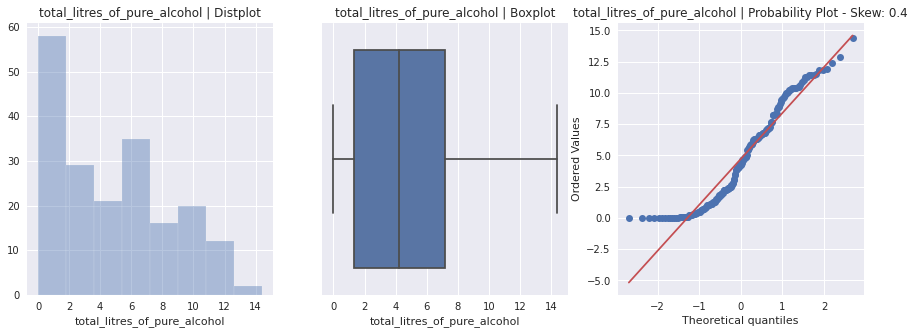

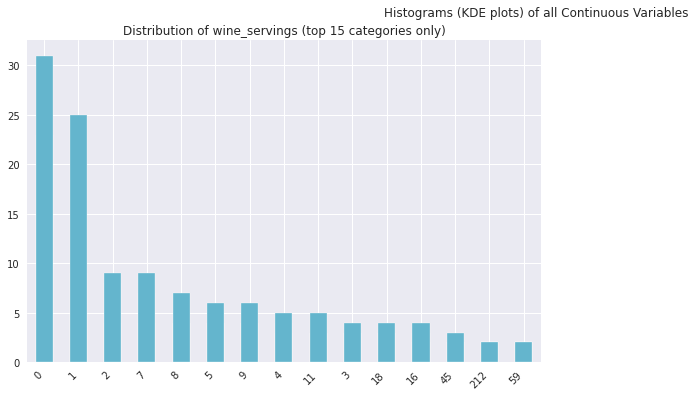

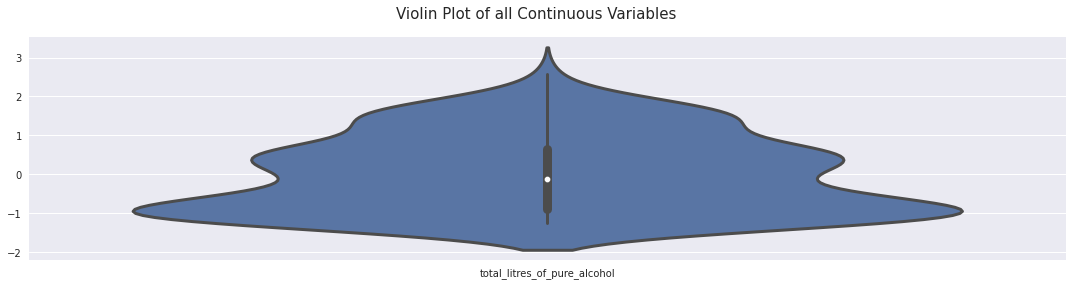

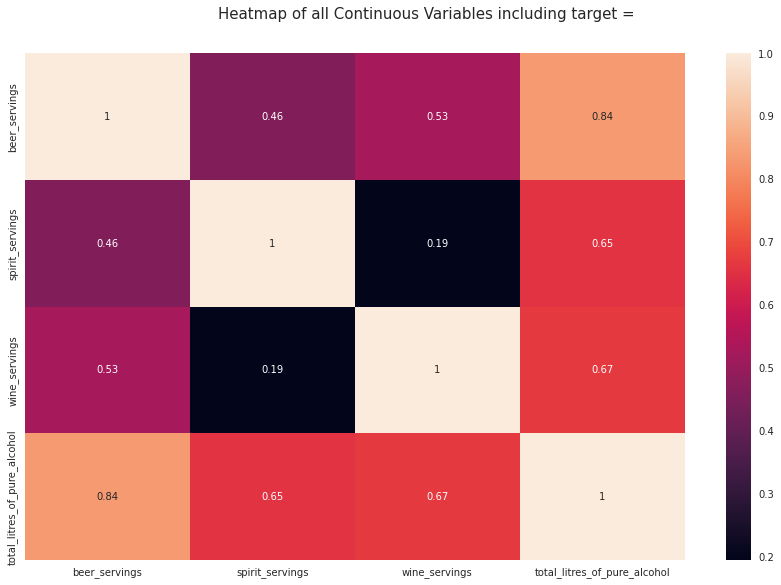

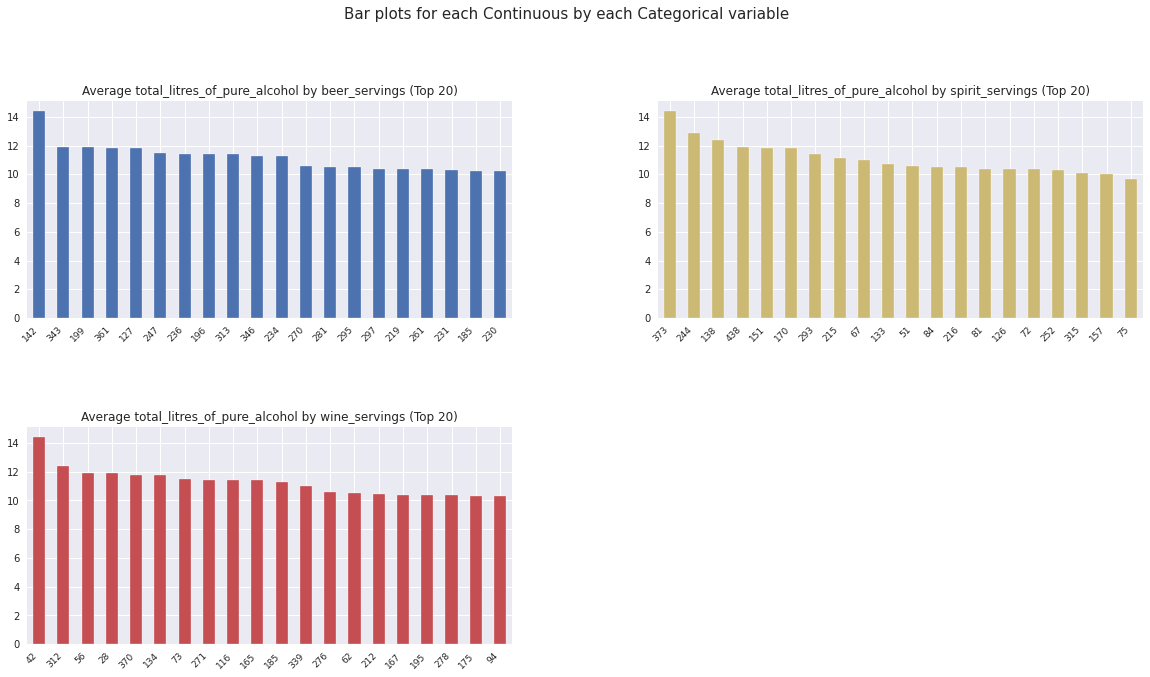

Time to run AutoViz (in seconds) = 3.159

 ###################### VISUALIZATION Completed ########################


In [33]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz("../input/alcohol-consumption/drinks.csv")

# Data Visualisation

In [34]:
df['country'].value_counts()# all are unique

Afghanistan    1
Libya          1
Niger          1
Nigeria        1
Niue           1
              ..
Greece         1
Grenada        1
Guatemala      1
Guinea         1
Zimbabwe       1
Name: country, Length: 193, dtype: int64

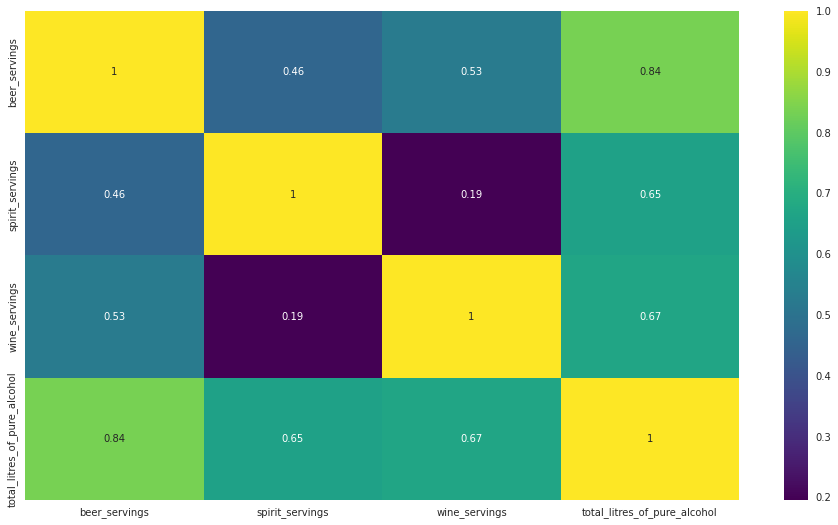

In [35]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(df.corr(),annot = True, cmap = 'viridis')
plt.show()

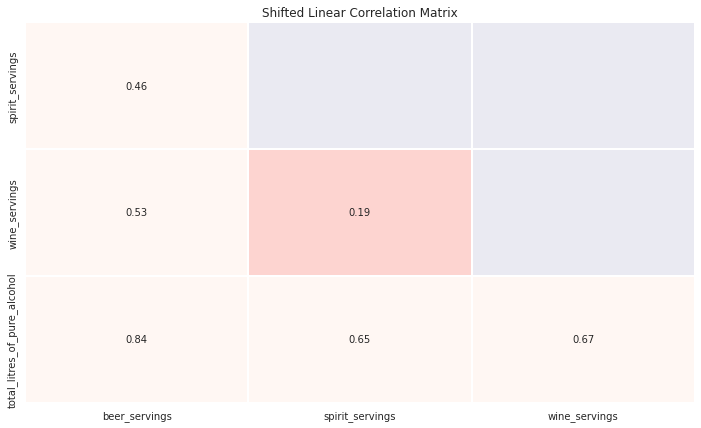

In [36]:
''' Plot a Shifted Correlation Matrix '''
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(df.drop(['country'],axis = 1))

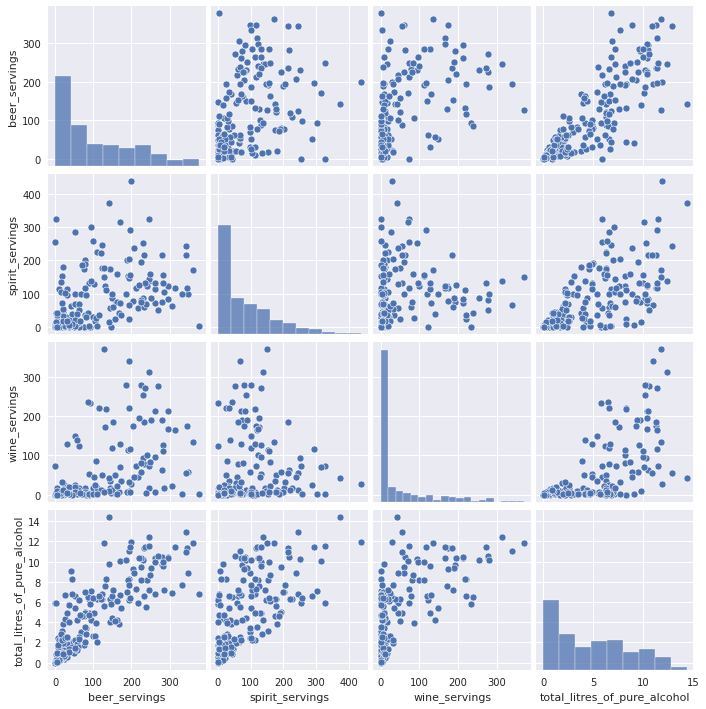

In [37]:
sns.pairplot(df)

# Analysis and Visualisation using Queries

In [38]:
fig = px.histogram(df, 'beer_servings',             
                   color="country",
                   title="<b>Average beer_servings per country</b>")

fig.add_vline(x=df['beer_servings'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

#### We can see that morethan 100 countries are serving beer less than the mean of that column and less than 100 units per person

# Query 1 : Find all the countries with less than 100 units per person in beer servings

In [39]:
df[df['beer_servings'] < 100]['country']

0      Afghanistan
1          Albania
2          Algeria
7          Armenia
10      Azerbaijan
          ...     
186     Uzbekistan
187        Vanuatu
190          Yemen
191         Zambia
192       Zimbabwe
Name: country, Length: 114, dtype: object

In [40]:
df[df['beer_servings'] < 100]['country'].count()

114

#### count of countries which serve less 100 units beer per person is 114

# Visualisation of Query 1

In [41]:
y = df[df['beer_servings'] < 100]['country']
x = df[df['beer_servings'] < 100]['beer_servings']
data = go.Bar(x= x,y= y,orientation = 'h',textposition='auto',opacity=0.8)
layout = go.Layout(title = 'country vs beer_servings lessthan 100',width=1000,height=1500)
fig = go.Figure(data=data,layout=layout)
fig.show()

# Query 2 : Find all the countries with greather than 100 units per person in beer servings

In [42]:
df[df['beer_servings'] > 100]['country']

3                Andorra
4                 Angola
5      Antigua & Barbuda
6              Argentina
8              Australia
             ...        
182       United Kingdom
184                  USA
185              Uruguay
188            Venezuela
189              Vietnam
Name: country, Length: 79, dtype: object

In [43]:
df[df['beer_servings'] > 100]['country'].count()

79

#### count of countries which serve less 100 units beer per person is 79

# Visualisation of Query 2

In [44]:
y = df[df['beer_servings'] > 100]['country']
x = df[df['beer_servings'] > 100]['beer_servings']
data = go.Bar(x= x,y= y,orientation = 'h',textposition='auto',opacity=0.8)
layout = go.Layout(title = 'country vs beer_servings greatherthan 100',width=1000,height=1500)
fig = go.Figure(data=data,layout=layout)
fig.update_traces(marker_color='red')
fig.show()

# Query 3 : Sort all the values of beer_servings and plot them

In [45]:
df_sort_beer = df[['country','beer_servings']].sort_values('beer_servings')
df_sort_beer

country  beer_servings
0       Afghanistan              0
40     Cook Islands              0
79             Iran              0
90           Kuwait              0
97            Libya              0
..              ...            ...
135          Poland            343
65          Germany            346
62            Gabon            347
45   Czech Republic            361
117         Namibia            376

[193 rows x 2 columns]

In [46]:
y = df_sort_beer['country']
x = df_sort_beer['beer_servings']
data = go.Bar(x= x,y= y,orientation = 'h',textposition='auto',opacity=0.8)
layout = go.Layout(title = 'Simple Bar Chart',width=1000,height=1500)
fig = go.Figure(data=data,layout=layout)
fig.update_traces(marker_color='yellowgreen')
fig.show()

#### Nambia, czeh republic, gabon, germany, poland are top 5 countries which produces more units of beer per person

# Query 4: Find the Country which serves more units of beer per person

In [47]:
beer_max = df['beer_servings'].max()
beer_max

376

In [48]:
df[df['beer_servings'] == beer_max]

country  beer_servings  spirit_servings  wine_servings  \
117  Namibia            376                3              1   

     total_litres_of_pure_alcohol  
117                           6.8

# Query 5: Find the country which serves less units of beer per person

In [49]:
beer_min = df['beer_servings'].min()
beer_min

0

In [50]:
df[df['beer_servings'] == beer_min]

country  beer_servings  spirit_servings  wine_servings  \
0         Afghanistan              0                0              0   
13         Bangladesh              0                0              0   
40       Cook Islands              0              254             74   
46        North Korea              0                0              0   
79               Iran              0                0              0   
90             Kuwait              0                0              0   
97              Libya              0                0              0   
103          Maldives              0                0              0   
106  Marshall Islands              0                0              0   
107        Mauritania              0                0              0   
111            Monaco              0                0              0   
128          Pakistan              0                0              0   
147        San Marino              0                0              0   
149      Saudi Arabia              0                5              0   
158           Somalia              0                0              0   

     total_litres_of_pure_alcohol  
0                             0.0  
13                            0.0  
40                            5.9  
46                            0.0  
79                            0.0  
90                            0.0  
97                            0.0  
103                           0.0  
106                           0.0  
107                           0.0  
111                           0.0  
128                           0.0  
147                           0.0  
149                           0.1  
158                           0.0

#### One intresting fact here is that country which has beer_savings with 0 has entire row zero except for countries cook islands and saudi arabia

# Query 6: Find the countries which has beer_servings greather than mean of its column

In [51]:
df[df['beer_servings'] > df['beer_servings'].mean()]['country'].values

array(['Andorra', 'Angola', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bolivia',
       'Botswana', 'Brazil', 'Bulgaria', 'Cabo Verde', 'Cameroon',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Estonia', 'Finland', 'France', 'Gabon', 'Germany', 'Greece',
       'Grenada', 'Hungary', 'Iceland', 'Ireland', 'Kazakhstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Namibia',
       'Netherlands', 'New Zealand', 'Niue', 'Norway', 'Palau', 'Panama',
       'Paraguay', 'Peru', 'Poland', 'Portugal', 'South Korea', 'Moldova',
       'Romania', 'Russian Federation', 'St. Kitts & Nevis', 'St. Lucia',
       'St. Vincent & the Grenadines', 'Serbia', 'Seychelles', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Suriname', 'Sweden',
       'Switzerland', 'Trinidad & Tobago', 'Ukraine', 'United Kingdom',
       'U

# Query 7: Find the top 10 countries which serves more units of beer per person

In [52]:
df[['country','beer_servings']].sort_values('beer_servings').tail(10)

country  beer_servings
140         Romania            297
129           Palau            306
81          Ireland            313
188       Venezuela            333
98        Lithuania            343
135          Poland            343
65          Germany            346
62            Gabon            347
45   Czech Republic            361
117         Namibia            376

# Query 8: Find the bottom 10 countries which serves less units of beer per person

In [53]:
df[['country','beer_servings']].sort_values('beer_servings').head(10)

country  beer_servings
0         Afghanistan              0
40       Cook Islands              0
79               Iran              0
90             Kuwait              0
97              Libya              0
103          Maldives              0
106  Marshall Islands              0
111            Monaco              0
128          Pakistan              0
147        San Marino              0

In [54]:
fig = px.histogram(df, 'spirit_servings',             
                   color="country",
                   title="<b>Average spirit_servings per country</b>")

fig.add_vline(x=df['spirit_servings'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

#### Morethan 100 countries serve less than 100 units per person of spirit 

# Query 9 : Find all the countries with less than 100 units per person in spirit servings

In [55]:
df[df['spirit_servings'] < 100]['country'].values

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Brunei', 'Burkina Faso',
       'Burundi', "Cote d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'North Korea', 'DR Congo', 'Denmark',
       'Djibouti', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Ghana',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Honduras', 'Iceland',
       'Indonesia', 'Iran', 'Iraq', 'Israel', 'Italy', 'Jamaica',
       'Jordan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Lebanon', 'Lesotho', 'Libya', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius',
       'Mexico', 'Micronesia', 'Monaco', 'Morocco', 'Mozambique',
       'M

In [56]:
df[df['spirit_servings'] < 100]['country'].count()

125

#### count of countries which serve less 100 units spirit per person is 125

# Visualisation of Query 9

In [57]:
y = df[df['spirit_servings'] < 100]['country']
x = df[df['spirit_servings'] < 100]['spirit_servings']
data = go.Bar(x= x,y= y,orientation = 'h',textposition='auto',opacity=0.8)
layout = go.Layout(title = 'country vs spirit_servings lessthan 100',width=1000,height=1500)
fig = go.Figure(data=data,layout=layout)
fig.show()

# Query 10 : Find all the countries with greather than 100 units per person in spirit servings

In [58]:
df[df['spirit_servings'] > 100]['country']

1                   Albania
3                   Andorra
5         Antigua & Barbuda
7                   Armenia
11                  Bahamas
               ...         
180                 Ukraine
181    United Arab Emirates
182          United Kingdom
184                     USA
186              Uzbekistan
Name: country, Length: 64, dtype: object

In [59]:
df[df['spirit_servings'] > 100]['country'].count()

64

#### count of countries which serve less 100 units spirit per person is 64

# Visualisation of Query 10

In [60]:
y = df[df['spirit_servings'] > 100]['country']
x = df[df['spirit_servings'] > 100]['spirit_servings']
data = go.Bar(x= x,y= y,orientation = 'h',textposition='auto',opacity=0.8)
layout = go.Layout(title = 'country vs spirit_servings greatherthan 100',width=1000,height=1500)
fig = go.Figure(data=data,layout=layout)
fig.update_traces(marker_color='red')
fig.show()

# Query 11 : Sort all the values of spirit_servings and plot them

In [61]:
df_sort_spirit = df[['country','spirit_servings']].sort_values('spirit_servings')
df_sort_spirit

country  spirit_servings
0           Afghanistan                0
27              Burundi                0
128            Pakistan                0
118               Nauru                0
111              Monaco                0
..                  ...              ...
144           St. Lucia              315
73                Haiti              326
141  Russian Federation              326
15              Belarus              373
68              Grenada              438

[193 rows x 2 columns]

In [62]:
y = df_sort_spirit['country']
x = df_sort_spirit['spirit_servings']
data = go.Bar(x= x,y= y,orientation = 'h',textposition='auto',opacity=0.8)
layout = go.Layout(title = 'sorted values WRT spirit_servings',width=1000,height=1500)
fig = go.Figure(data=data,layout=layout)
fig.update_traces(marker_color='yellowgreen')
fig.show()

# Query 12: Find the Country which serves more units of spirit per person

In [63]:
spirit_max = df['spirit_servings'].max()
spirit_max

438

In [64]:
df[df['spirit_servings'] == spirit_max]

country  beer_servings  spirit_servings  wine_servings  \
68  Grenada            199              438             28   

    total_litres_of_pure_alcohol  
68                          11.9

# Query 13: Find the country which serves less units of spirit per person

In [65]:
spirit_min = df['spirit_servings'].min()
spirit_min

0

In [66]:
df[df['spirit_servings'] == spirit_min][['country','spirit_servings']]

country  spirit_servings
0          Afghanistan                0
2              Algeria                0
13          Bangladesh                0
19              Bhutan                0
27             Burundi                0
46         North Korea                0
55   Equatorial Guinea                0
56             Eritrea                0
63              Gambia                0
70              Guinea                0
79                Iran                0
90              Kuwait                0
92                Laos                0
97               Libya                0
103           Maldives                0
106   Marshall Islands                0
107         Mauritania                0
111             Monaco                0
118              Nauru                0
128           Pakistan                0
147         San Marino                0
158            Somalia                0
190              Yemen                0

# Query 14: Find the countries which has spirit_servings greather than mean of its column

In [67]:
df[df['spirit_servings'] > df['spirit_servings'].mean()]['country'].values

array(['Albania', 'Andorra', 'Antigua & Barbuda', 'Armenia', 'Bahamas',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia-Herzegovina',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Estonia', 'Finland',
       'France', 'Gabon', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Ireland',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Latvia',
       'Liberia', 'Lithuania', 'Luxembourg', 'Malta', 'Mongolia',
       'Montenegro', 'Netherlands', 'Nicaragua', 'Niue', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Moldova', 'Romania',
       'Russian Federation', 'St. Kitts & Nevis', 'St. Lucia',
       'St. Vincent & the Grenadines', 'Serbia', 'Slovakia', 'Spain',
       'Sri Lanka', 'Suriname', 'Switzerland', 'Thailand',
       'Trinidad & Tobago', 'Ukraine',

# Query 15: Find the top 10 countries which serves more units of spirits per person

In [68]:
df[['country','spirit_servings']].sort_values('spirit_servings').tail(10)

country  spirit_servings
40         Cook Islands              254
169            Thailand              258
50             Dominica              286
155            Slovakia              293
72               Guyana              302
144           St. Lucia              315
73                Haiti              326
141  Russian Federation              326
15              Belarus              373
68              Grenada              438

# Query 16: Find the bottom 10 countries which serves less units of spirit per person

In [69]:
df[['country','spirit_servings']].sort_values('spirit_servings').head(10)

country  spirit_servings
0          Afghanistan                0
27             Burundi                0
128           Pakistan                0
118              Nauru                0
111             Monaco                0
46         North Korea                0
107         Mauritania                0
106   Marshall Islands                0
103           Maldives                0
55   Equatorial Guinea                0

In [70]:
fig = px.histogram(df, 'wine_servings',             
                   color="country",
                   title="<b>Average wine_servings per country</b>")

fig.add_vline(x=df['wine_servings'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

# Query 17 : Find all the countries with less than 10 units per person in wine servings

In [71]:
df[df['wine_servings'] < 10]['country']

0      Afghanistan
10      Azerbaijan
12         Bahrain
13      Bangladesh
17          Belize
          ...     
188      Venezuela
189        Vietnam
190          Yemen
191         Zambia
192       Zimbabwe
Name: country, Length: 103, dtype: object

In [72]:
df[df['wine_servings'] < 10]['country'].count()

103

#### count of countries which serve less 10 units wine per person is 103

# Visualisation of Query 17

In [73]:
y = df[df['wine_servings'] < 10]['country']
x = df[df['wine_servings'] < 10]['wine_servings']
data = go.Bar(x= x,y= y,orientation = 'h',textposition='auto',opacity=0.8)
layout = go.Layout(title = 'country vs wine_servings lessthan 10',width=1000,height=1500)
fig = go.Figure(data=data,layout=layout)
fig.show()

# Query 18 : Find all the countries with greather than 10 units per person in wine servings

In [74]:
df[df['wine_servings'] > 10]['country']

1                Albania
2                Algeria
3                Andorra
4                 Angola
5      Antigua & Barbuda
             ...        
180              Ukraine
182       United Kingdom
184                  USA
185              Uruguay
187              Vanuatu
Name: country, Length: 88, dtype: object

In [75]:
df[df['wine_servings'] > 10]['country'].count()

88

#### count of countries which serve less 10 units beer per person is 88

# Visualisation of Query 18

In [76]:
y = df[df['wine_servings'] > 10]['country']
x = df[df['wine_servings'] > 10]['wine_servings']
data = go.Bar(x= x,y= y,orientation = 'h',textposition='auto',opacity=0.8)
layout = go.Layout(title = 'country vs wine_servings greatherthan 10',width=1000,height=1500)
fig = go.Figure(data=data,layout=layout)
fig.update_traces(marker_color='red')
fig.show()

# Query 19 : Sort all the values of wine_servings and plot them

In [77]:
df_sort_wine = df[['country','wine_servings']].sort_values('wine_servings')
df_sort_wine

country  wine_servings
0         Afghanistan              0
27            Burundi              0
116           Myanmar              0
107        Mauritania              0
106  Marshall Islands              0
..                ...            ...
48            Denmark            278
166       Switzerland            280
3             Andorra            312
136          Portugal            339
61             France            370

[193 rows x 2 columns]

In [78]:
y = df_sort_wine['country']
x = df_sort_wine['wine_servings']
data = go.Bar(x= x,y= y,orientation = 'h',textposition='auto',opacity=0.8)
layout = go.Layout(title = 'sorted values WRT wine_servings',width=1000,height=1500)
fig = go.Figure(data=data,layout=layout)
fig.update_traces(marker_color='yellowgreen')
fig.show()

# Query 20: Find the Country which serves more units of wine per person

In [79]:
wine_max = df['wine_servings'].max()
wine_max

370

In [80]:
df[df['wine_servings'] == wine_max]

country  beer_servings  spirit_servings  wine_servings  \
61  France            127              151            370   

    total_litres_of_pure_alcohol  
61                          11.8

# Query 21: Find the country which serves less units of wine per person

In [81]:
wine_min = df['wine_servings'].min()
wine_min

0

In [82]:
df[df['wine_servings'] == wine_min][['country','wine_servings']]

country  wine_servings
0         Afghanistan              0
13         Bangladesh              0
19             Bhutan              0
27            Burundi              0
46        North Korea              0
56            Eritrea              0
58           Ethiopia              0
77              India              0
78          Indonesia              0
79               Iran              0
80               Iraq              0
90             Kuwait              0
95            Lesotho              0
97              Libya              0
102          Malaysia              0
103          Maldives              0
106  Marshall Islands              0
107        Mauritania              0
111            Monaco              0
116           Myanmar              0
119             Nepal              0
128          Pakistan              0
142            Rwanda              0
147        San Marino              0
149      Saudi Arabia              0
158           Somalia              0
161         Sri Lanka              0
162             Sudan              0
168        Tajikistan              0
179            Uganda              0
190             Yemen              0

# Query 22: Find the countries which has wine_servings greather than mean of its column

In [83]:
df[df['wine_servings'] > df['wine_servings'].mean()]['country'].values

array(['Albania', 'Andorra', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Belgium', 'Bulgaria', 'Canada', 'Chile',
       'Cook Islands', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Equatorial Guinea', 'Estonia', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Laos', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Paraguay',
       'Poland', 'Portugal', 'Romania', 'Russian Federation', 'St. Lucia',
       'Sao Tome & Principe', 'Serbia', 'Seychelles', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Macedonia', 'United Kingdom', 'USA', 'Uruguay'], dtype=object)

# Query 23: Find the top 10 countries which serves more units of wine per person

In [84]:
df[['country','wine_servings']].sort_values('wine_servings').tail(10)

country  wine_servings
55   Equatorial Guinea            233
83               Italy            237
42             Croatia            254
99          Luxembourg            271
156           Slovenia            276
48             Denmark            278
166        Switzerland            280
3              Andorra            312
136           Portugal            339
61              France            370

# Query 24: Find the bottom 10 countries which serves less units of wine per person

In [85]:
df[['country','wine_servings']].sort_values('wine_servings').head(10)

country  wine_servings
0         Afghanistan              0
27            Burundi              0
116           Myanmar              0
107        Mauritania              0
106  Marshall Islands              0
103          Maldives              0
102          Malaysia              0
97              Libya              0
119             Nepal              0
95            Lesotho              0

In [86]:
fig = px.histogram(df, 'total_litres_of_pure_alcohol',             
                   color="country",
                   title="<b>Average total_litres_of_pure_alcohol per country</b>")

fig.add_vline(x=df['total_litres_of_pure_alcohol'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

# Query 25 : Find all the countries with less than 6 litres of pure alcohol

In [87]:
df[df['total_litres_of_pure_alcohol'] < 6]['country']

0            Afghanistan
1                Albania
2                Algeria
4                 Angola
5      Antigua & Barbuda
             ...        
187              Vanuatu
189              Vietnam
190                Yemen
191               Zambia
192             Zimbabwe
Name: country, Length: 118, dtype: object

In [88]:
df[df['total_litres_of_pure_alcohol'] < 6]['country'].count()

118

#### count of countries which serve less 6 litres of pure alocohol is 118

# Visualisation of Query 25

In [89]:
y = df[df['total_litres_of_pure_alcohol'] < 6]['country']
x = df[df['total_litres_of_pure_alcohol'] < 6]['total_litres_of_pure_alcohol']
data = go.Bar(x= x,y= y,orientation = 'h',textposition='auto',opacity=0.8)
layout = go.Layout(title = 'country vs total_litres_of_pure_alcohol less than 6 litres',width=1000,height=1500)
fig = go.Figure(data=data,layout=layout)
fig.show()

# Query 26 : Find all the countries with greather than 6 litres of pure alcohol

In [90]:
df[df['total_litres_of_pure_alcohol'] > 6]['country']

3             Andorra
6           Argentina
8           Australia
9             Austria
11            Bahamas
            ...      
180           Ukraine
182    United Kingdom
184               USA
185           Uruguay
188         Venezuela
Name: country, Length: 75, dtype: object

In [91]:
df[df['total_litres_of_pure_alcohol'] > 6]['country'].count()

75

#### count of countries which serve greatherthan 6 litres of pure alocohol is 75

# Visualisation of Query 25

In [92]:
y = df[df['total_litres_of_pure_alcohol'] > 6]['country']
x = df[df['total_litres_of_pure_alcohol'] > 6]['total_litres_of_pure_alcohol']
data = go.Bar(x= x,y= y,orientation = 'h',textposition='auto',opacity=0.8)
layout = go.Layout(title = 'country vs total_litres_of_pure_alcohol greather than 6 litres',width=1000,height=1500)
fig = go.Figure(data=data,layout=layout)
fig.show()

# Query 26 : Sort all the values of total_litres_of_pure_alcohol and plot them

In [93]:
df_sort_alcohol = df[['country','total_litres_of_pure_alcohol']].sort_values('total_litres_of_pure_alcohol')
df_sort_alcohol

country  total_litres_of_pure_alcohol
0       Afghanistan                           0.0
147      San Marino                           0.0
128        Pakistan                           0.0
46      North Korea                           0.0
13       Bangladesh                           0.0
..              ...                           ...
45   Czech Republic                          11.8
68          Grenada                          11.9
3           Andorra                          12.4
98        Lithuania                          12.9
15          Belarus                          14.4

[193 rows x 2 columns]

In [94]:
y = df_sort_alcohol['country']
x = df_sort_alcohol['total_litres_of_pure_alcohol']
data = go.Bar(x= x,y= y,orientation = 'h',textposition='auto',opacity=0.8)
layout = go.Layout(title = 'sorting values of total_litres_of_pure_alcohol',width=1000,height=1500)
fig = go.Figure(data=data,layout=layout)
fig.update_traces(marker_color='yellowgreen')
fig.show()

# Query 27: Find the Country which serves more total_litres_of_pure_alcohol

In [95]:
alcohol_max = df['total_litres_of_pure_alcohol'].max()
alcohol_max

14.4

In [96]:
df[df['total_litres_of_pure_alcohol'] == alcohol_max]

country  beer_servings  spirit_servings  wine_servings  \
15  Belarus            142              373             42   

    total_litres_of_pure_alcohol  
15                          14.4

# Query 28: Find the Country which serves less total_litres_of_pure_alcohol

In [97]:
alcohol_min = df['total_litres_of_pure_alcohol'].min()
alcohol_min

0.0

In [98]:
df[df['total_litres_of_pure_alcohol'] == alcohol_min][['country','total_litres_of_pure_alcohol']]

country  total_litres_of_pure_alcohol
0         Afghanistan                           0.0
13         Bangladesh                           0.0
46        North Korea                           0.0
79               Iran                           0.0
90             Kuwait                           0.0
97              Libya                           0.0
103          Maldives                           0.0
106  Marshall Islands                           0.0
107        Mauritania                           0.0
111            Monaco                           0.0
128          Pakistan                           0.0
147        San Marino                           0.0
158           Somalia                           0.0

# Query 29: Find the countries which has total_litres_of_pure_alcoholthan mean of its column

In [99]:
df[df['total_litres_of_pure_alcohol'] > df['total_litres_of_pure_alcohol'].mean()]

country  beer_servings  spirit_servings  wine_servings  \
1              Albania             89              132             54   
3              Andorra            245              138            312   
4               Angola            217               57             45   
5    Antigua & Barbuda            102              128             45   
6            Argentina            193               25            221   
..                 ...            ...              ...            ...   
182     United Kingdom            219              126            195   
183           Tanzania             36                6              1   
184                USA            249              158             84   
185            Uruguay            115               35            220   
188          Venezuela            333              100              3   

     total_litres_of_pure_alcohol  
1                             4.9  
3                            12.4  
4                             5.9  
5                             4.9  
6                             8.3  
..                            ...  
182                          10.4  
183                           5.7  
184                           8.7  
185                           6.6  
188                           7.7  

[90 rows x 5 columns]

# Query 30: Find the top 10 countries with total_litres_of_pure_alcohol

In [100]:
df[['country','total_litres_of_pure_alcohol']].sort_values('total_litres_of_pure_alcohol').tail(10)

country  total_litres_of_pure_alcohol
99           Luxembourg                          11.4
155            Slovakia                          11.4
81              Ireland                          11.4
141  Russian Federation                          11.5
61               France                          11.8
45       Czech Republic                          11.8
68              Grenada                          11.9
3               Andorra                          12.4
98            Lithuania                          12.9
15              Belarus                          14.4

# Query 31: Find the bottom 10 countries with total_litres_of_pure_alcohol

In [101]:
df[['country','total_litres_of_pure_alcohol']].sort_values('total_litres_of_pure_alcohol').head(10)

country  total_litres_of_pure_alcohol
0         Afghanistan                           0.0
147        San Marino                           0.0
128          Pakistan                           0.0
46        North Korea                           0.0
13         Bangladesh                           0.0
111            Monaco                           0.0
106  Marshall Islands                           0.0
103          Maldives                           0.0
107        Mauritania                           0.0
90             Kuwait                           0.0

# Query 32: Find top 5 contries in each column and plot grouped bar plot

In [102]:
a = []
for i in df_sort_beer['country'].tail(5):
    a.append(i)
df_sort_beer.tail()

country  beer_servings
135          Poland            343
65          Germany            346
62            Gabon            347
45   Czech Republic            361
117         Namibia            376

In [103]:
for i in df_sort_spirit['country'].tail(5):
    a.append(i)
df_sort_spirit.tail()

country  spirit_servings
144           St. Lucia              315
73                Haiti              326
141  Russian Federation              326
15              Belarus              373
68              Grenada              438

In [104]:
for i in df_sort_wine['country'].tail(5):
    a.append(i)
df_sort_wine.tail()

country  wine_servings
48       Denmark            278
166  Switzerland            280
3        Andorra            312
136     Portugal            339
61        France            370

In [105]:
for i in df_sort_alcohol['country'].tail(5):
    a.append(i)
df_sort_alcohol.tail()

country  total_litres_of_pure_alcohol
45  Czech Republic                          11.8
68         Grenada                          11.9
3          Andorra                          12.4
98       Lithuania                          12.9
15         Belarus                          14.4

In [106]:
a

['Poland',
 'Germany',
 'Gabon',
 'Czech Republic',
 'Namibia',
 'St. Lucia',
 'Haiti',
 'Russian Federation',
 'Belarus',
 'Grenada',
 'Denmark',
 'Switzerland',
 'Andorra',
 'Portugal',
 'France',
 'Czech Republic',
 'Grenada',
 'Andorra',
 'Lithuania',
 'Belarus']

In [107]:
c = []
for i in a:
    if i not in c:
        c.append(i)
c
# removing repeated countries

['Poland',
 'Germany',
 'Gabon',
 'Czech Republic',
 'Namibia',
 'St. Lucia',
 'Haiti',
 'Russian Federation',
 'Belarus',
 'Grenada',
 'Denmark',
 'Switzerland',
 'Andorra',
 'Portugal',
 'France',
 'Lithuania']

In [108]:
v = df['country'].index.values
v

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [109]:
m = []
for i in range(len(v)):
    if df['country'][i] in c:
        m.append(v[i])
m

[3, 15, 45, 48, 61, 62, 65, 68, 73, 98, 117, 135, 136, 141, 144, 166]

In [110]:
df_top5 = df.loc[m]
df_top5

# consists of states which are top 5 respective column

country  beer_servings  spirit_servings  wine_servings  \
3               Andorra            245              138            312   
15              Belarus            142              373             42   
45       Czech Republic            361              170            134   
48              Denmark            224               81            278   
61               France            127              151            370   
62                Gabon            347               98             59   
65              Germany            346              117            175   
68              Grenada            199              438             28   
73                Haiti              1              326              1   
98            Lithuania            343              244             56   
117             Namibia            376                3              1   
135              Poland            343              215             56   
136            Portugal            194               67            339   
141  Russian Federation            247              326             73   
144           St. Lucia            171              315             71   
166         Switzerland            185              100            280   

     total_litres_of_pure_alcohol  
3                            12.4  
15                           14.4  
45                           11.8  
48                           10.4  
61                           11.8  
62                            8.9  
65                           11.3  
68                           11.9  
73                            5.9  
98                           12.9  
117                           6.8  
135                          10.9  
136                          11.0  
141                          11.5  
144                          10.1  
166                          10.2

In [111]:
x = df_top5['country']
y1 = df_top5['beer_servings']
y2 = df_top5['spirit_servings']
y3 = df_top5['wine_servings']
y4 = df_top5['total_litres_of_pure_alcohol']
trace1 = go.Bar(x= x,y= y1,marker={'color' : '#FFB300'},name = 'beer_servings')    
trace2 = go.Bar(x= x,y= y2,marker={'color' : '#F7DC6F'},name = 'spirit_servings') 
trace3 = go.Bar(x= x,y= y3,marker={'color' : '#FF9800'},name = 'wine_servings')
trace4 = go.Bar(x= x,y= y4,marker={'color' : '#7CB342'},name = 'total_litres_of_pure_alcohol')
layout = go.Layout(title= 'Grouped Bar Chart' , width=980,height=800)
data = [trace1,trace2,trace3,trace4]
fig = go.Figure(data=data, layout=layout)
fig.show()

# over all visualisation of countries
# usa is most consistent team

# Query 32: Find the countries which has both beer_servings and spirit_servings greather than the mean of their respective column simultaneously

In [112]:
df[(df['beer_servings'] > df['beer_servings'].mean()) & (df['spirit_servings'] > df['spirit_servings'].mean())][['country','beer_servings','spirit_servings']]

country  beer_servings  spirit_servings
3                         Andorra            245              138
11                        Bahamas            122              176
14                       Barbados            143              173
15                        Belarus            142              373
16                        Belgium            295               84
17                         Belize            263              114
23                         Brazil            245              145
25                       Bulgaria            231              252
32                         Canada            240              122
35                          Chile            130              124
41                     Costa Rica            149               87
42                        Croatia            230               87
44                         Cyprus            192              154
45                 Czech Republic            361              170
48                        Denmark            224               81
51             Dominican Republic            193              147
57                        Estonia            224              194
60                        Finland            263              133
61                         France            127              151
62                          Gabon            347               98
65                        Germany            346              117
67                         Greece            133              112
68                        Grenada            199              438
75                        Hungary            234              215
81                        Ireland            313              118
87                     Kazakhstan            124              246
93                         Latvia            281              216
98                      Lithuania            343              244
99                     Luxembourg            236              133
105                         Malta            149              100
120                   Netherlands            251               88
125                          Niue            188              200
130                        Panama            285              104
132                      Paraguay            213              117
133                          Peru            163              160
135                        Poland            343              215
139                       Moldova            109              226
140                       Romania            297              122
141            Russian Federation            247              326
143             St. Kitts & Nevis            194              205
144                     St. Lucia            171              315
145  St. Vincent & the Grenadines            120              221
151                        Serbia            283              131
155                      Slovakia            196              293
160                         Spain            284              157
163                      Suriname            128              178
166                   Switzerland            185              100
174             Trinidad & Tobago            197              156
180                       Ukraine            206              237
182                United Kingdom            219              126
184                           USA            249              158
188                     Venezuela            333              100

# Query 33: Find the countries which has both wine_servings and total_litres_of_pure_alcohol greather than the median of their respective column simultaneously

In [113]:
df[(df['wine_servings'] > df['wine_servings'].median()) & (df['total_litres_of_pure_alcohol'] > df['total_litres_of_pure_alcohol'].median())][['country','wine_servings','total_litres_of_pure_alcohol']]

country  wine_servings  total_litres_of_pure_alcohol
1              Albania             54                           4.9
3              Andorra            312                          12.4
4               Angola             45                           5.9
5    Antigua & Barbuda             45                           4.9
6            Argentina            221                           8.3
..                 ...            ...                           ...
166        Switzerland            280                          10.2
180            Ukraine             45                           8.9
182     United Kingdom            195                          10.4
184                USA             84                           8.7
185            Uruguay            220                           6.6

[72 rows x 3 columns]

In [114]:
df['country'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', "Cote d'Ivoire",
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'North Korea', 'DR Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana',

#### Advanced Visualisation

In [115]:
def numerical_feature_overview(feature, rotation=0):
    print(feature, 'has', df[feature].isnull().sum() / len(df) * 100, '% of null values')
    f,ax = plt.subplots(1, 2, figsize=(20, 6))
    ax[0].tick_params(labelrotation=rotation)
    ax[1].tick_params(labelrotation=rotation)
    sns.scatterplot(data=df, x=feature, y='beer_servings', ax=ax[0]);
    sns.boxplot(data=df, x=feature, ax=ax[1])
    plt.show()

beer_servings has 0.0 % of null values


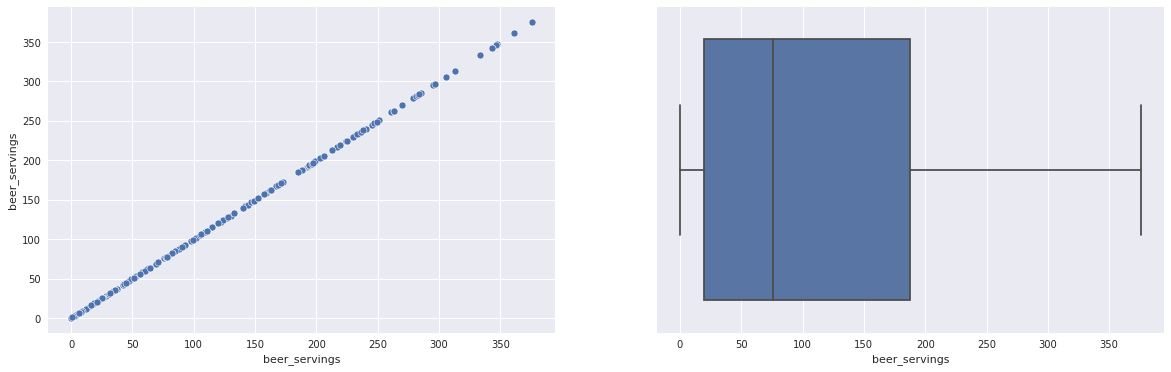

In [116]:
numerical_feature_overview('beer_servings')

spirit_servings has 0.0 % of null values


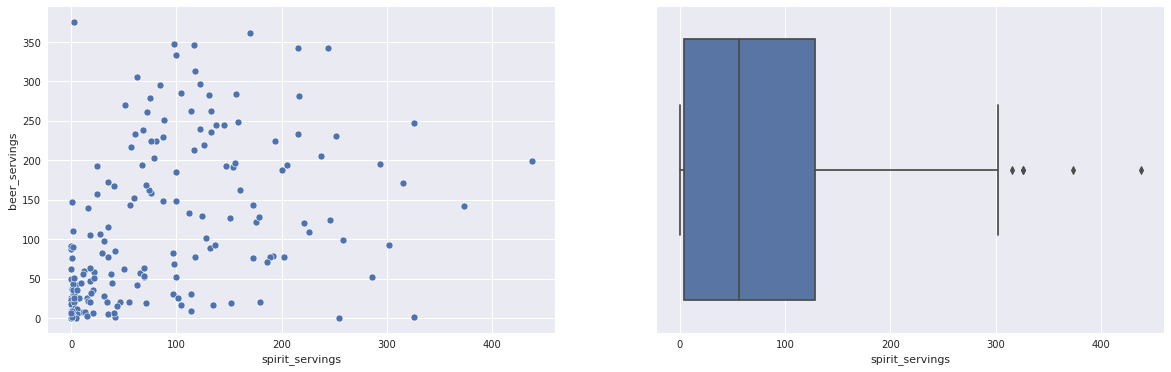

In [117]:
numerical_feature_overview('spirit_servings')

wine_servings has 0.0 % of null values


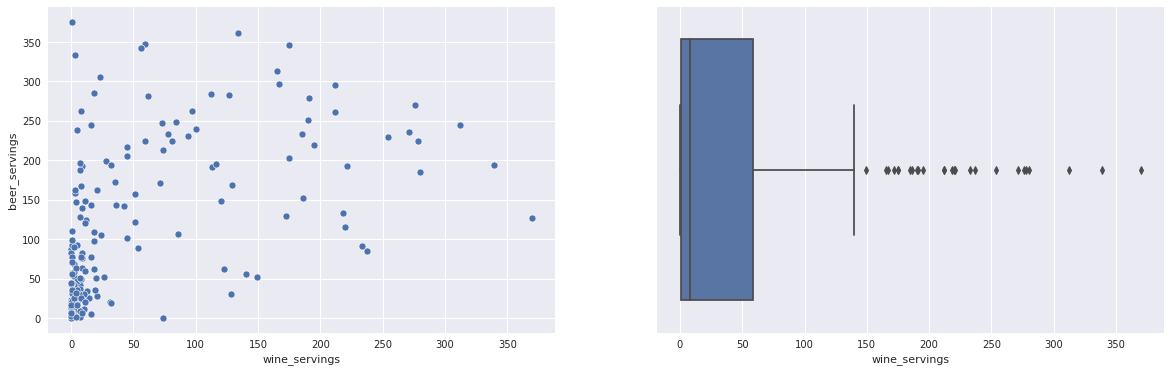

In [118]:
numerical_feature_overview('wine_servings')

total_litres_of_pure_alcohol has 0.0 % of null values


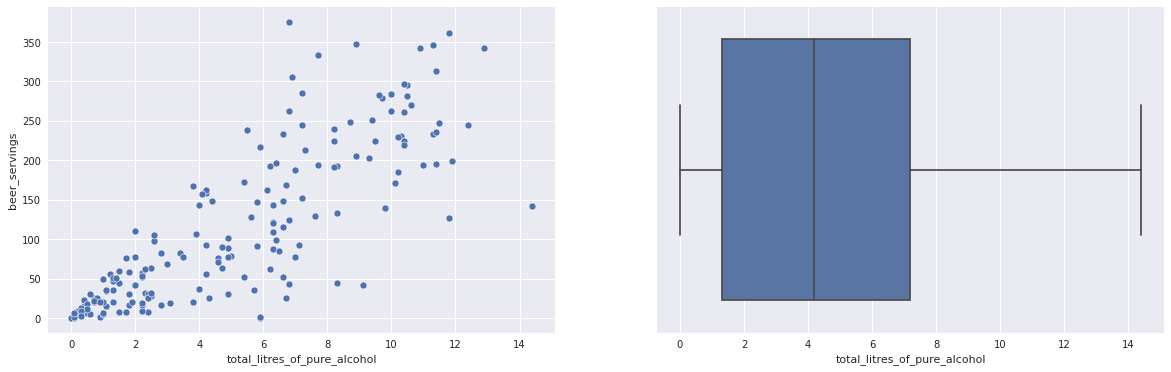

In [119]:
numerical_feature_overview('total_litres_of_pure_alcohol')

# Count of Outliers using IQR method

In [120]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
x = df.drop(['country'],axis = 1)
for i in x.columns:
    count_outliers(x,i)

No outliers in beer_servings
There are outliers in spirit_servings
Count of outliers are: 5
There are outliers in wine_servings
Count of outliers are: 26
No outliers in total_litres_of_pure_alcohol


In [121]:
Num_vars = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']

In [122]:
Cat_vars = df.drop(Num_vars, axis = 1).columns.tolist()
Cat_vars

['country']

In [123]:
Cat_vars_low = list(df[Cat_vars].loc[:, (df[Cat_vars].nunique() < 10)].nunique().index)
Cat_vars_high = list(df[Cat_vars].loc[:, (df[Cat_vars].nunique() >= 10)].nunique().index)

In [124]:
sns.set_theme(rc = {'grid.linewidth': 0.5,
                    'axes.linewidth': 0.75, 'axes.facecolor': '#fff3e9', 'axes.labelcolor': '#6b1000',
                    'figure.facecolor': '#f7e7da'})
                    #'xtick.labelcolor': '#6b1000', 'ytick.labelcolor': '#6b1000'

## Scatter plots

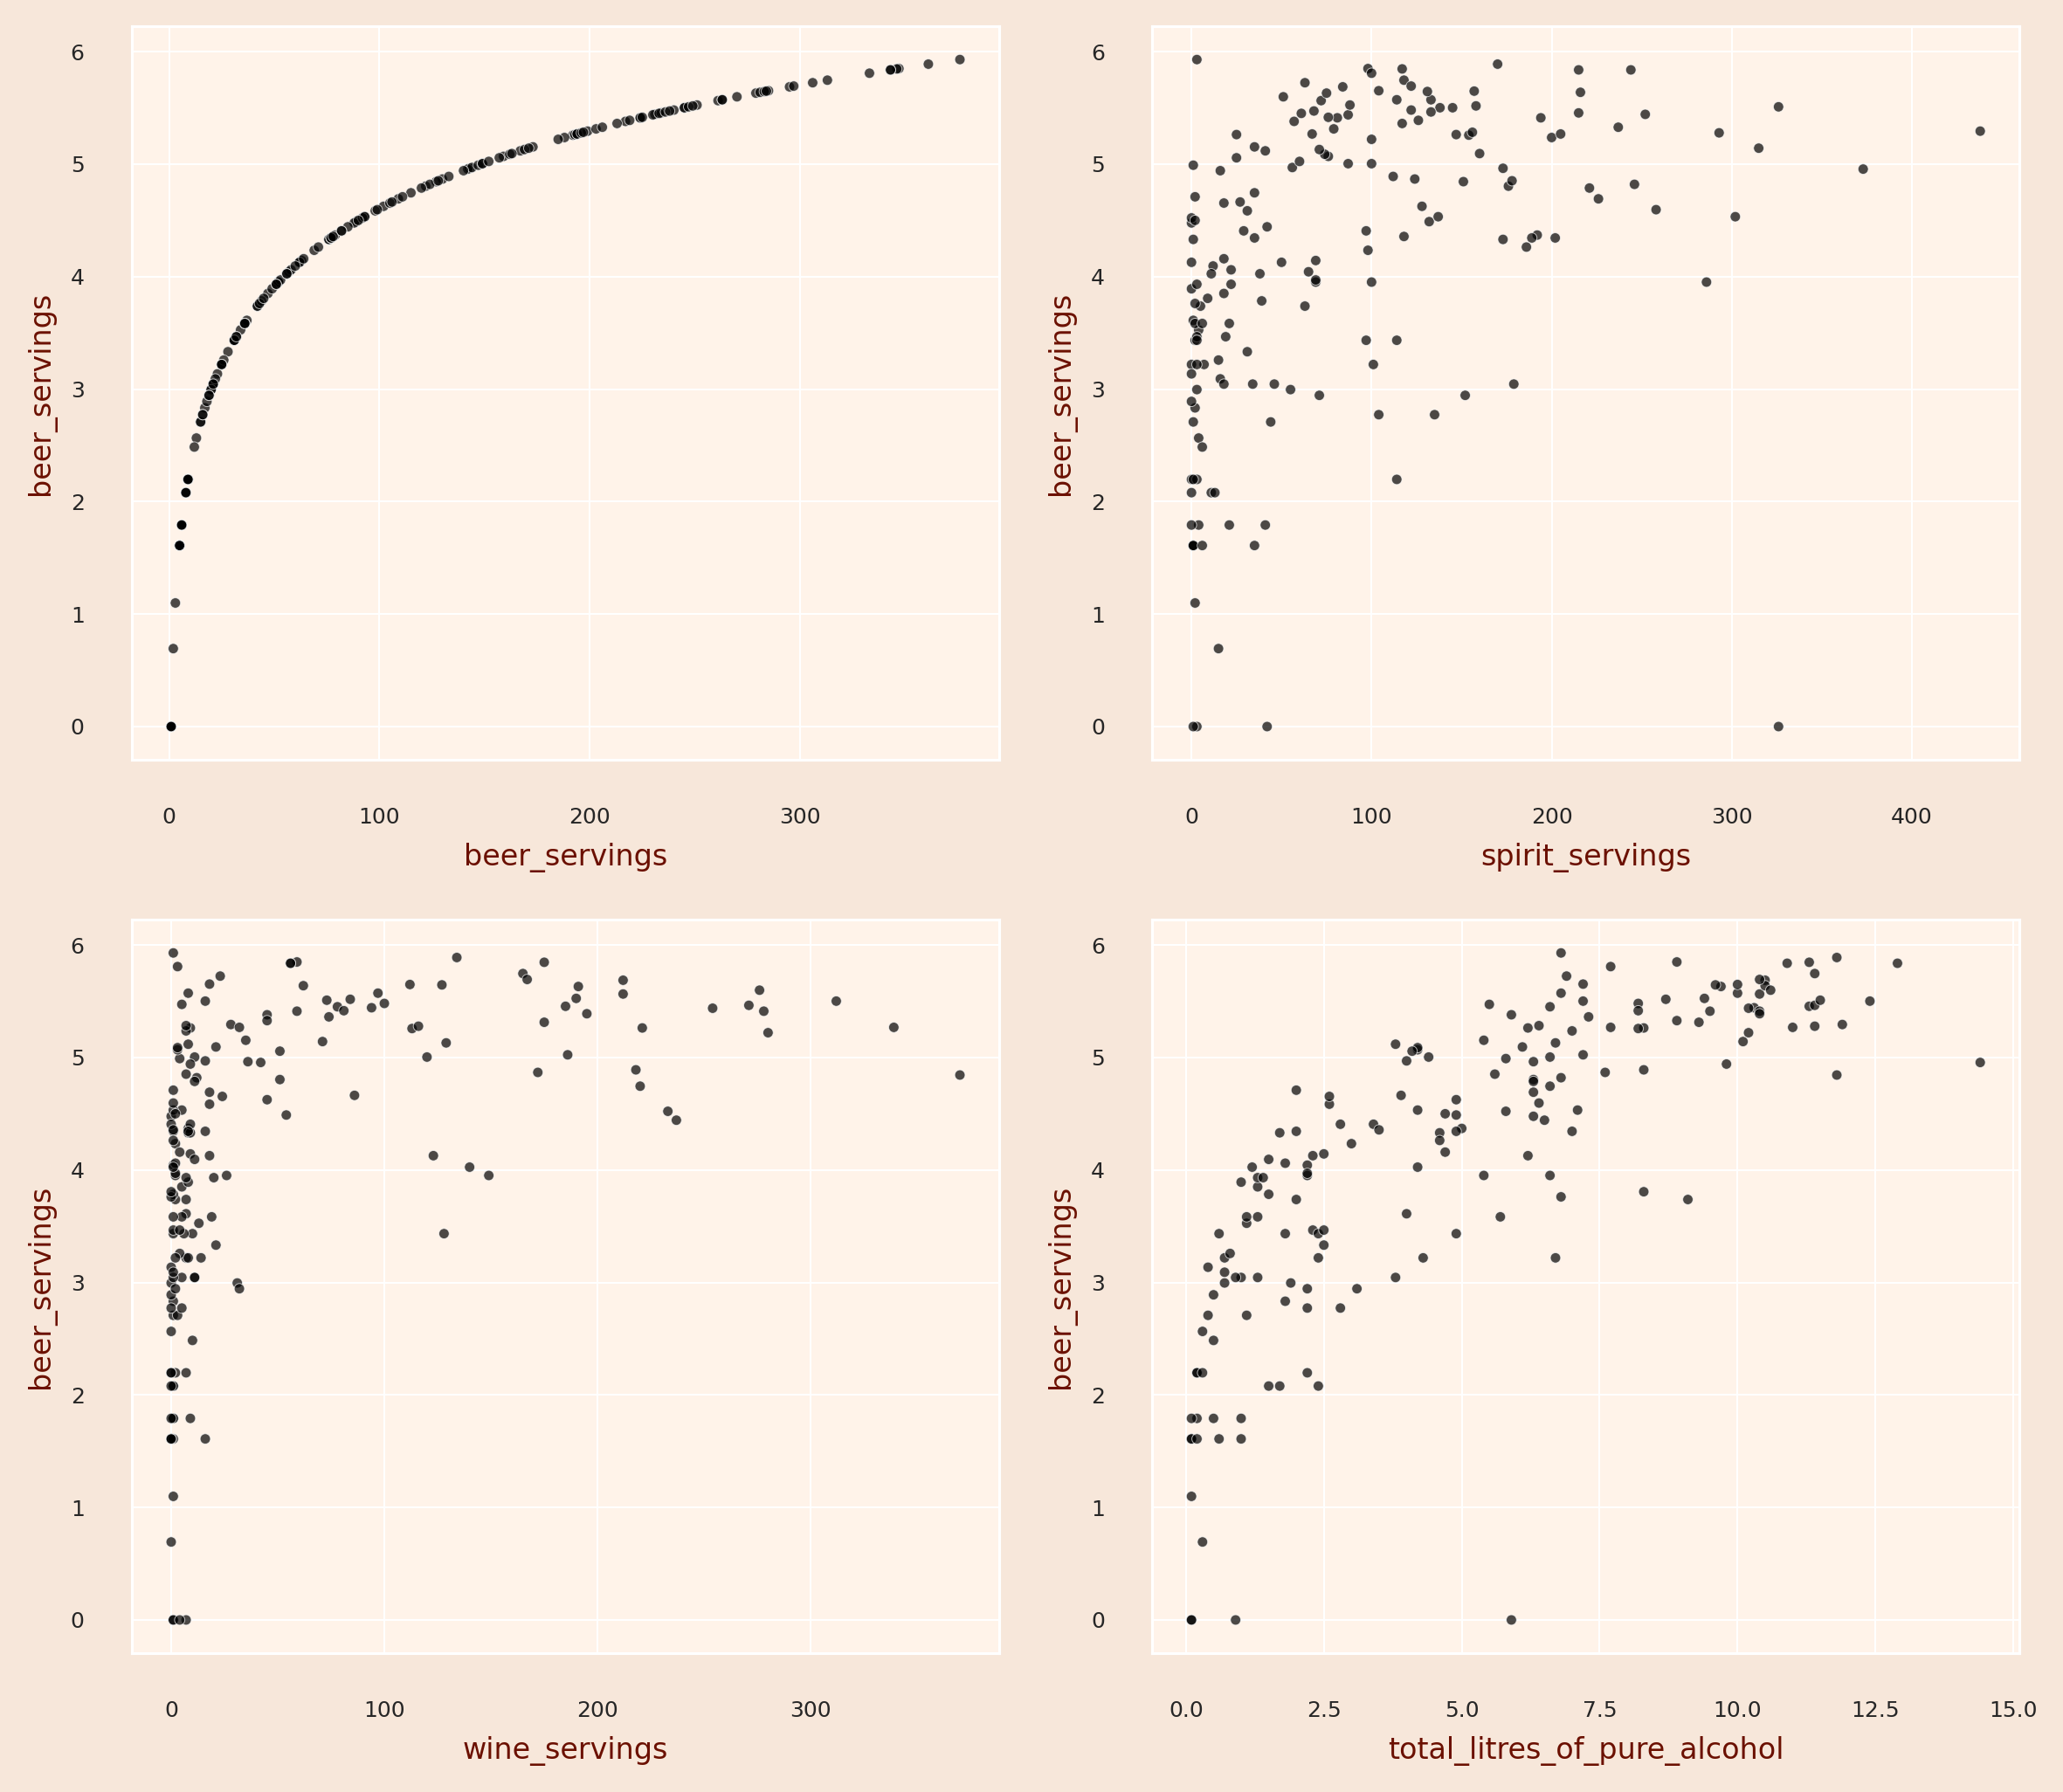

In [125]:
with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 8, 
                          'xtick.labelsize': 6, 'ytick.labelsize': 6}): 
    
    fig_0, ax_0 = plt.subplots(2, 2, figsize = (8, 7))

    for idx, (column, axes) in list(enumerate(zip(Num_vars, ax_0.flatten()))):
        
        sns.scatterplot(ax = axes, x = df[column], 
                        y = np.log(df['beer_servings']), 
                        hue =  np.log(df['beer_servings']),
                        palette = 'viridis', alpha = 0.7, s = 8)
    
    # Get rid of legend
    
        axes.legend([], [], frameon = False)
    
    # Remove empty figures
    
    else:
        [axes.set_visible(False) for axes in ax_0.flatten()[idx + 1:]]

plt.tight_layout()
plt.show()

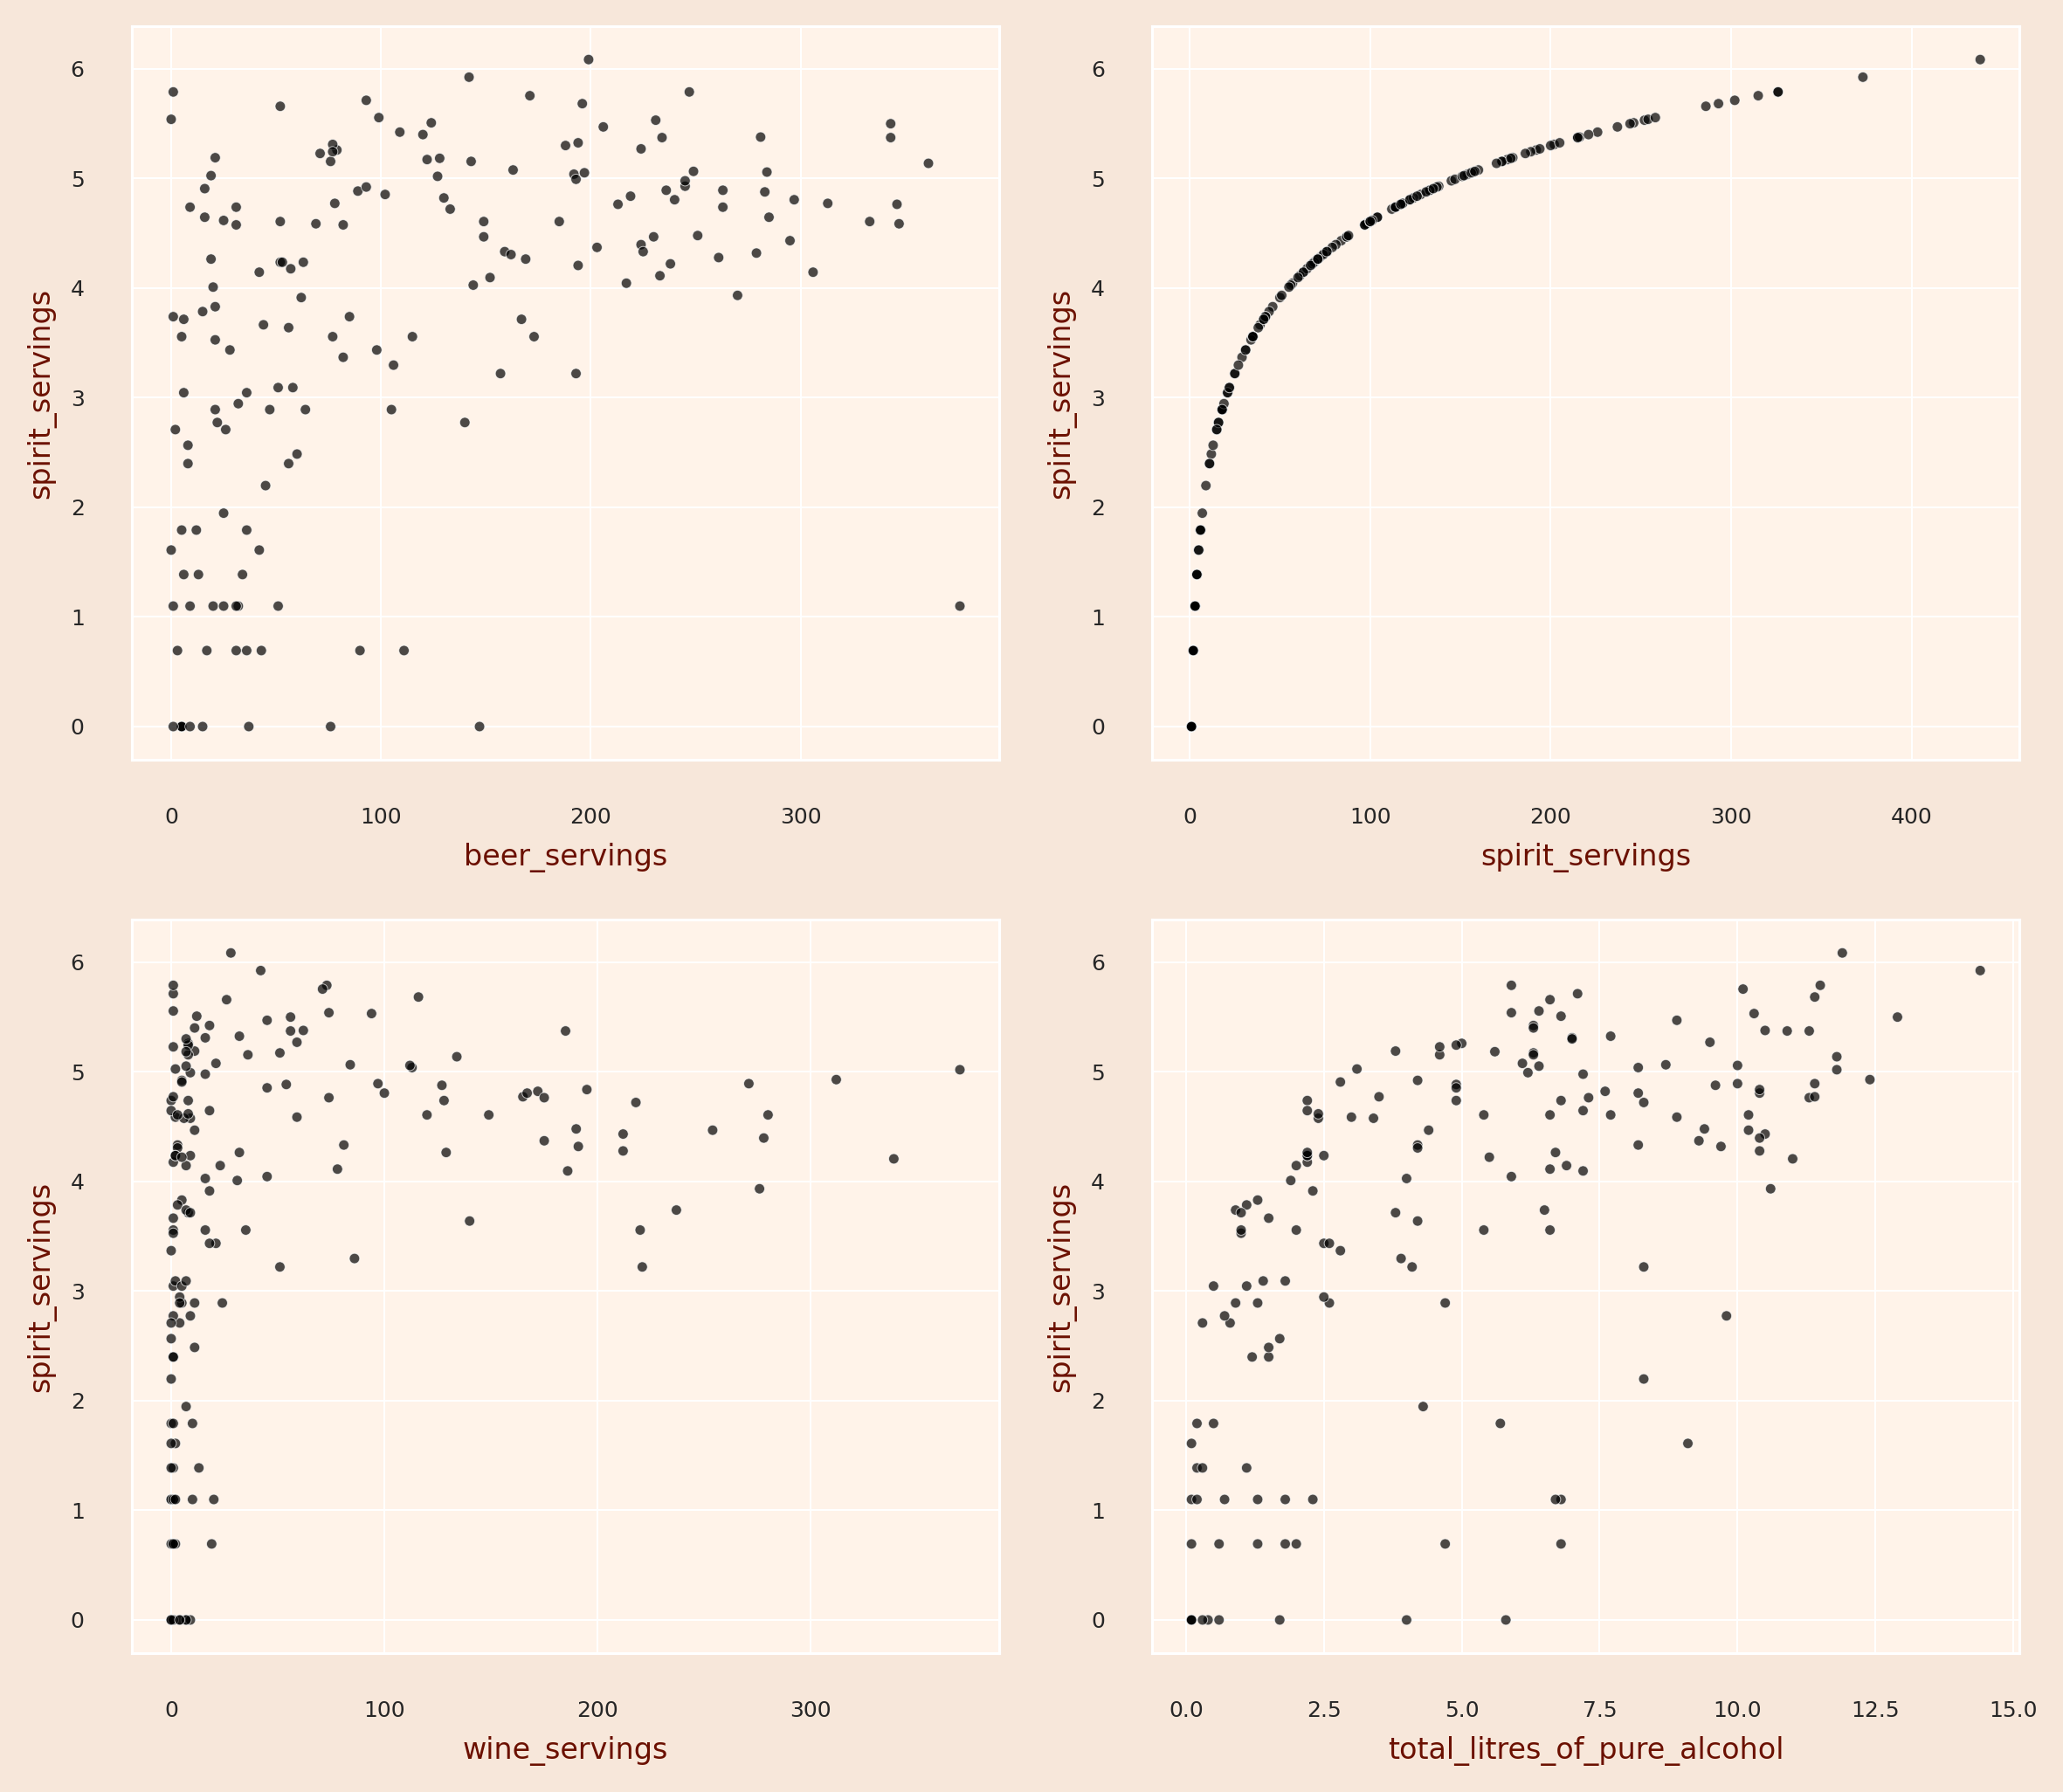

In [126]:
with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 8, 
                          'xtick.labelsize': 6, 'ytick.labelsize': 6}): 
    
    fig_0, ax_0 = plt.subplots(2, 2, figsize = (8, 7))

    for idx, (column, axes) in list(enumerate(zip(Num_vars, ax_0.flatten()))):
        
        sns.scatterplot(ax = axes, x = df[column], 
                        y = np.log(df['spirit_servings']), 
                        hue =  np.log(df['spirit_servings']),
                        palette = 'viridis', alpha = 0.7, s = 8)
    
    # Get rid of legend
    
        axes.legend([], [], frameon = False)
    
    # Remove empty figures
    
    else:
        [axes.set_visible(False) for axes in ax_0.flatten()[idx + 1:]]

plt.tight_layout()
plt.show()

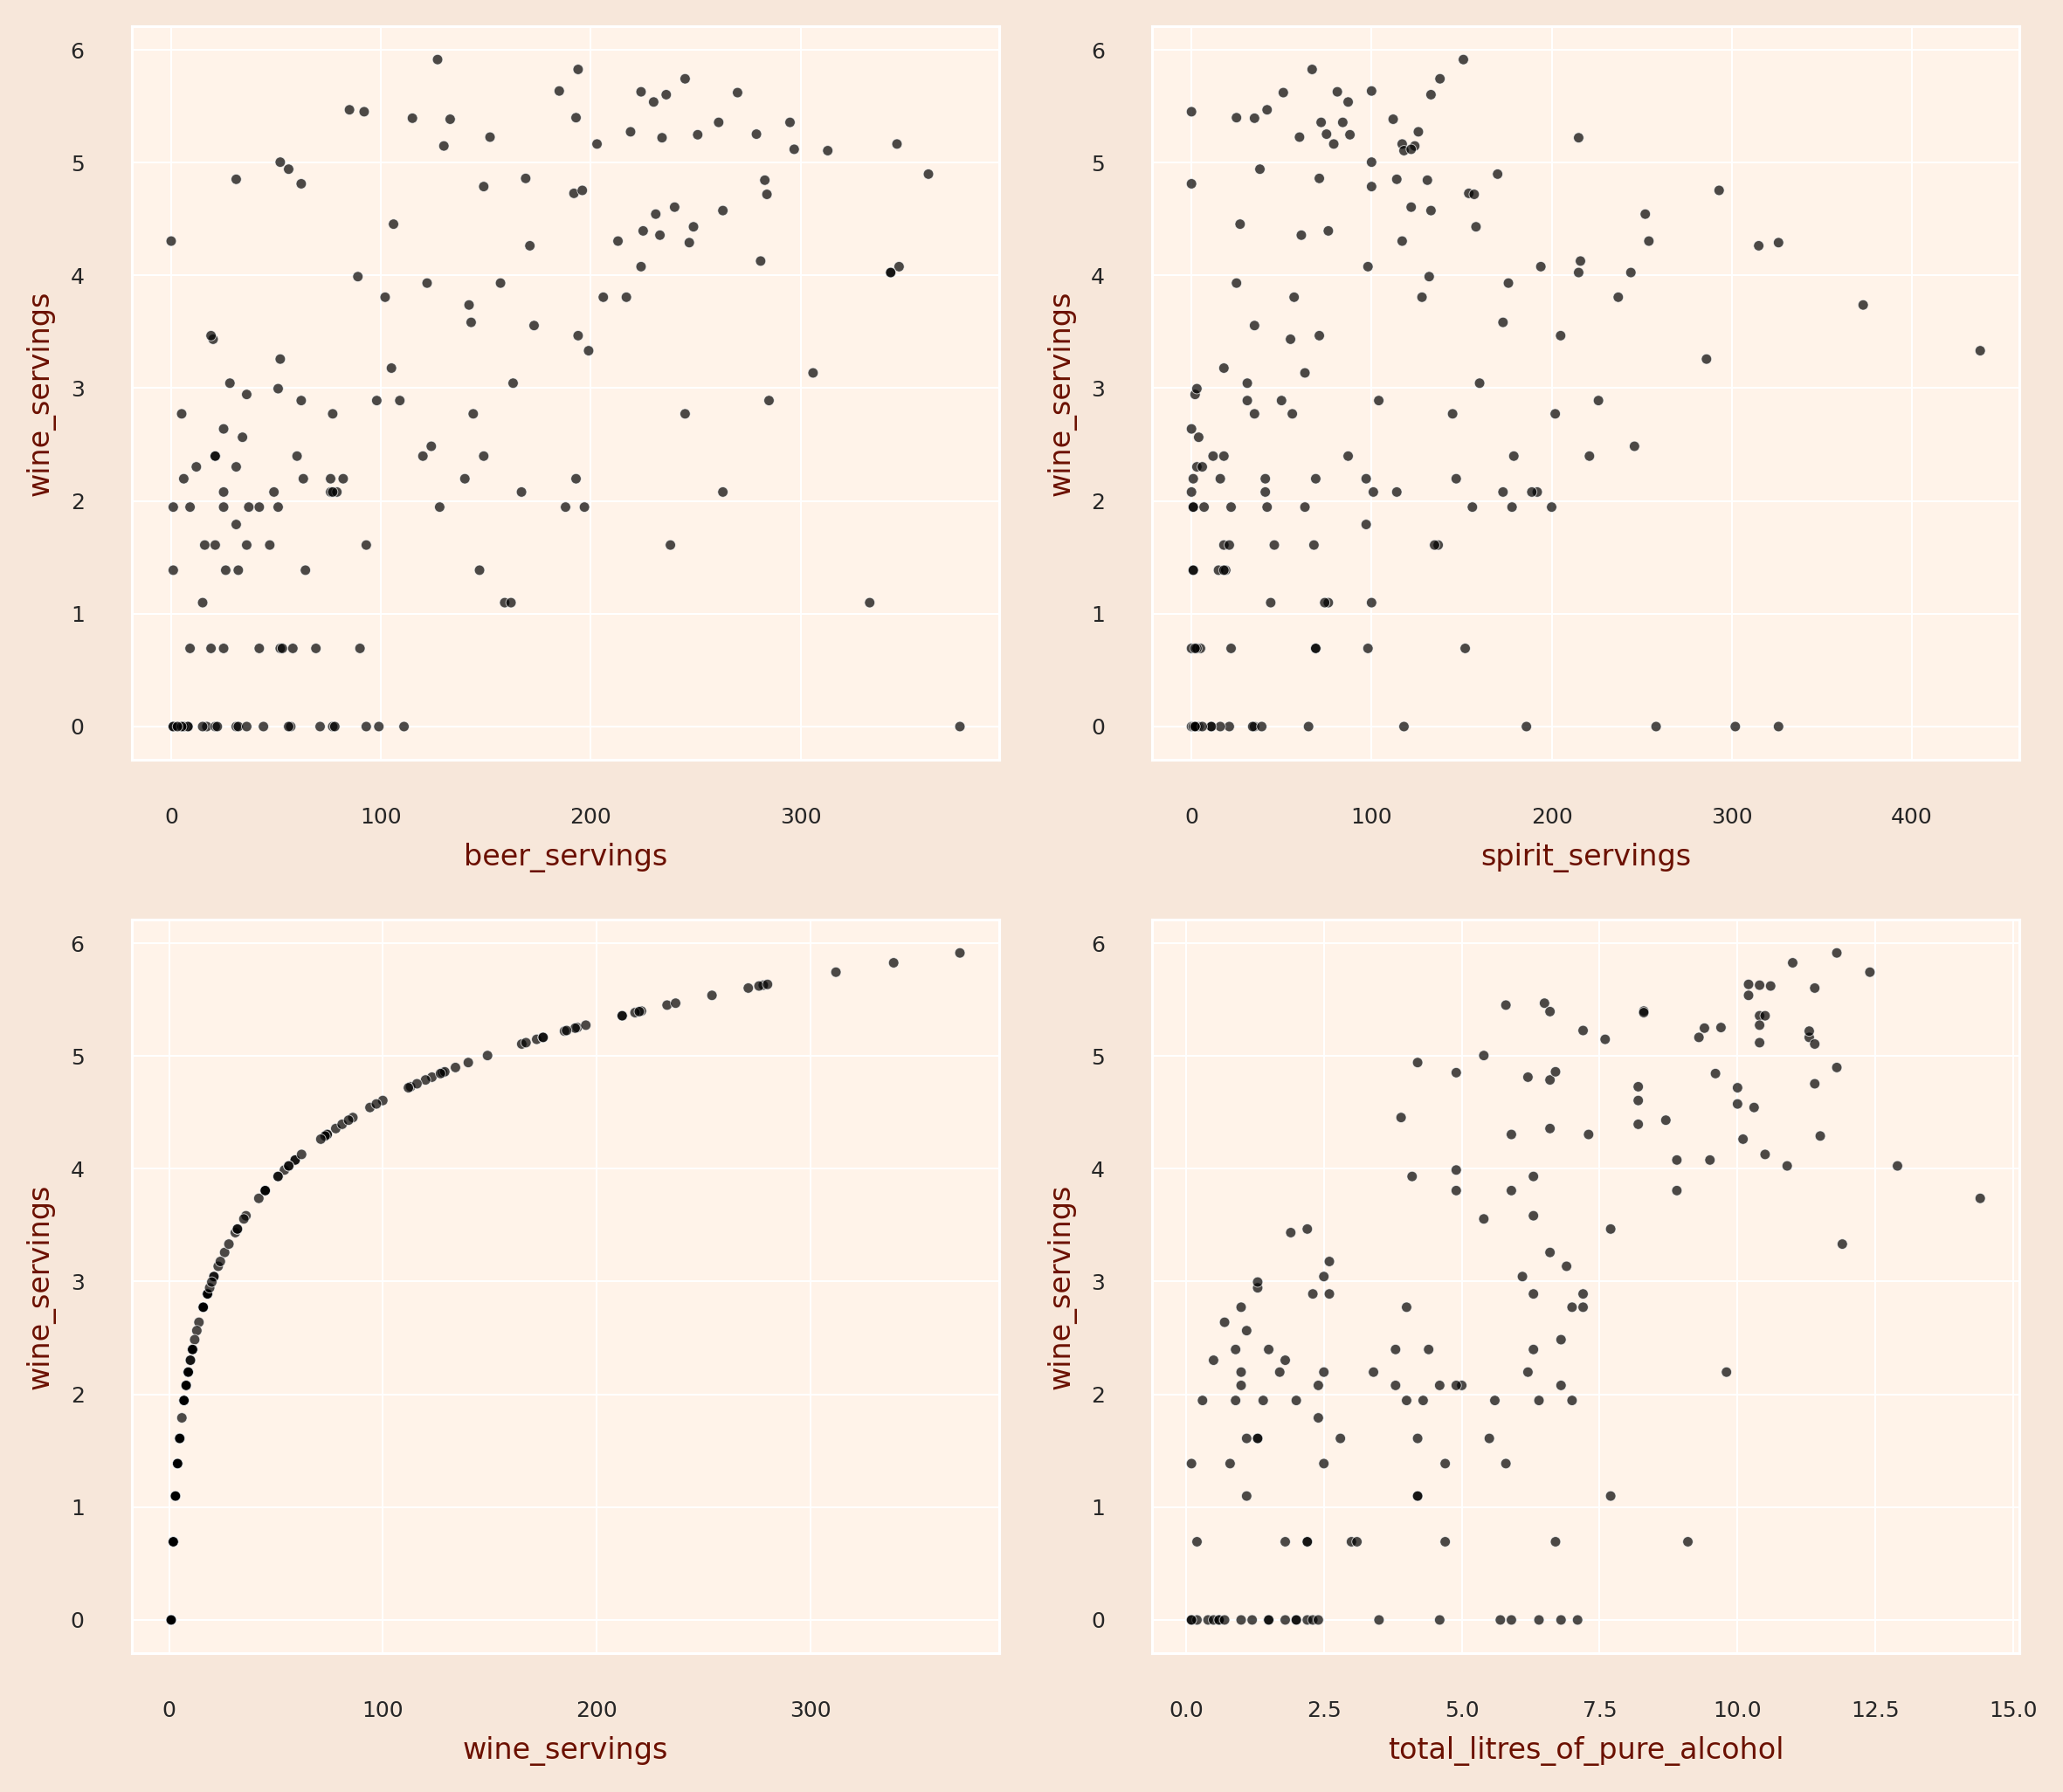

In [127]:
with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 8, 
                          'xtick.labelsize': 6, 'ytick.labelsize': 6}): 
    
    fig_0, ax_0 = plt.subplots(2, 2, figsize = (8, 7))

    for idx, (column, axes) in list(enumerate(zip(Num_vars, ax_0.flatten()))):
        
        sns.scatterplot(ax = axes, x = df[column], 
                        y = np.log(df['wine_servings']), 
                        hue =  np.log(df['wine_servings']),
                        palette = 'viridis', alpha = 0.7, s = 8)
    
    # Get rid of legend
    
        axes.legend([], [], frameon = False)
    
    # Remove empty figures
    
    else:
        [axes.set_visible(False) for axes in ax_0.flatten()[idx + 1:]]

plt.tight_layout()
plt.show()

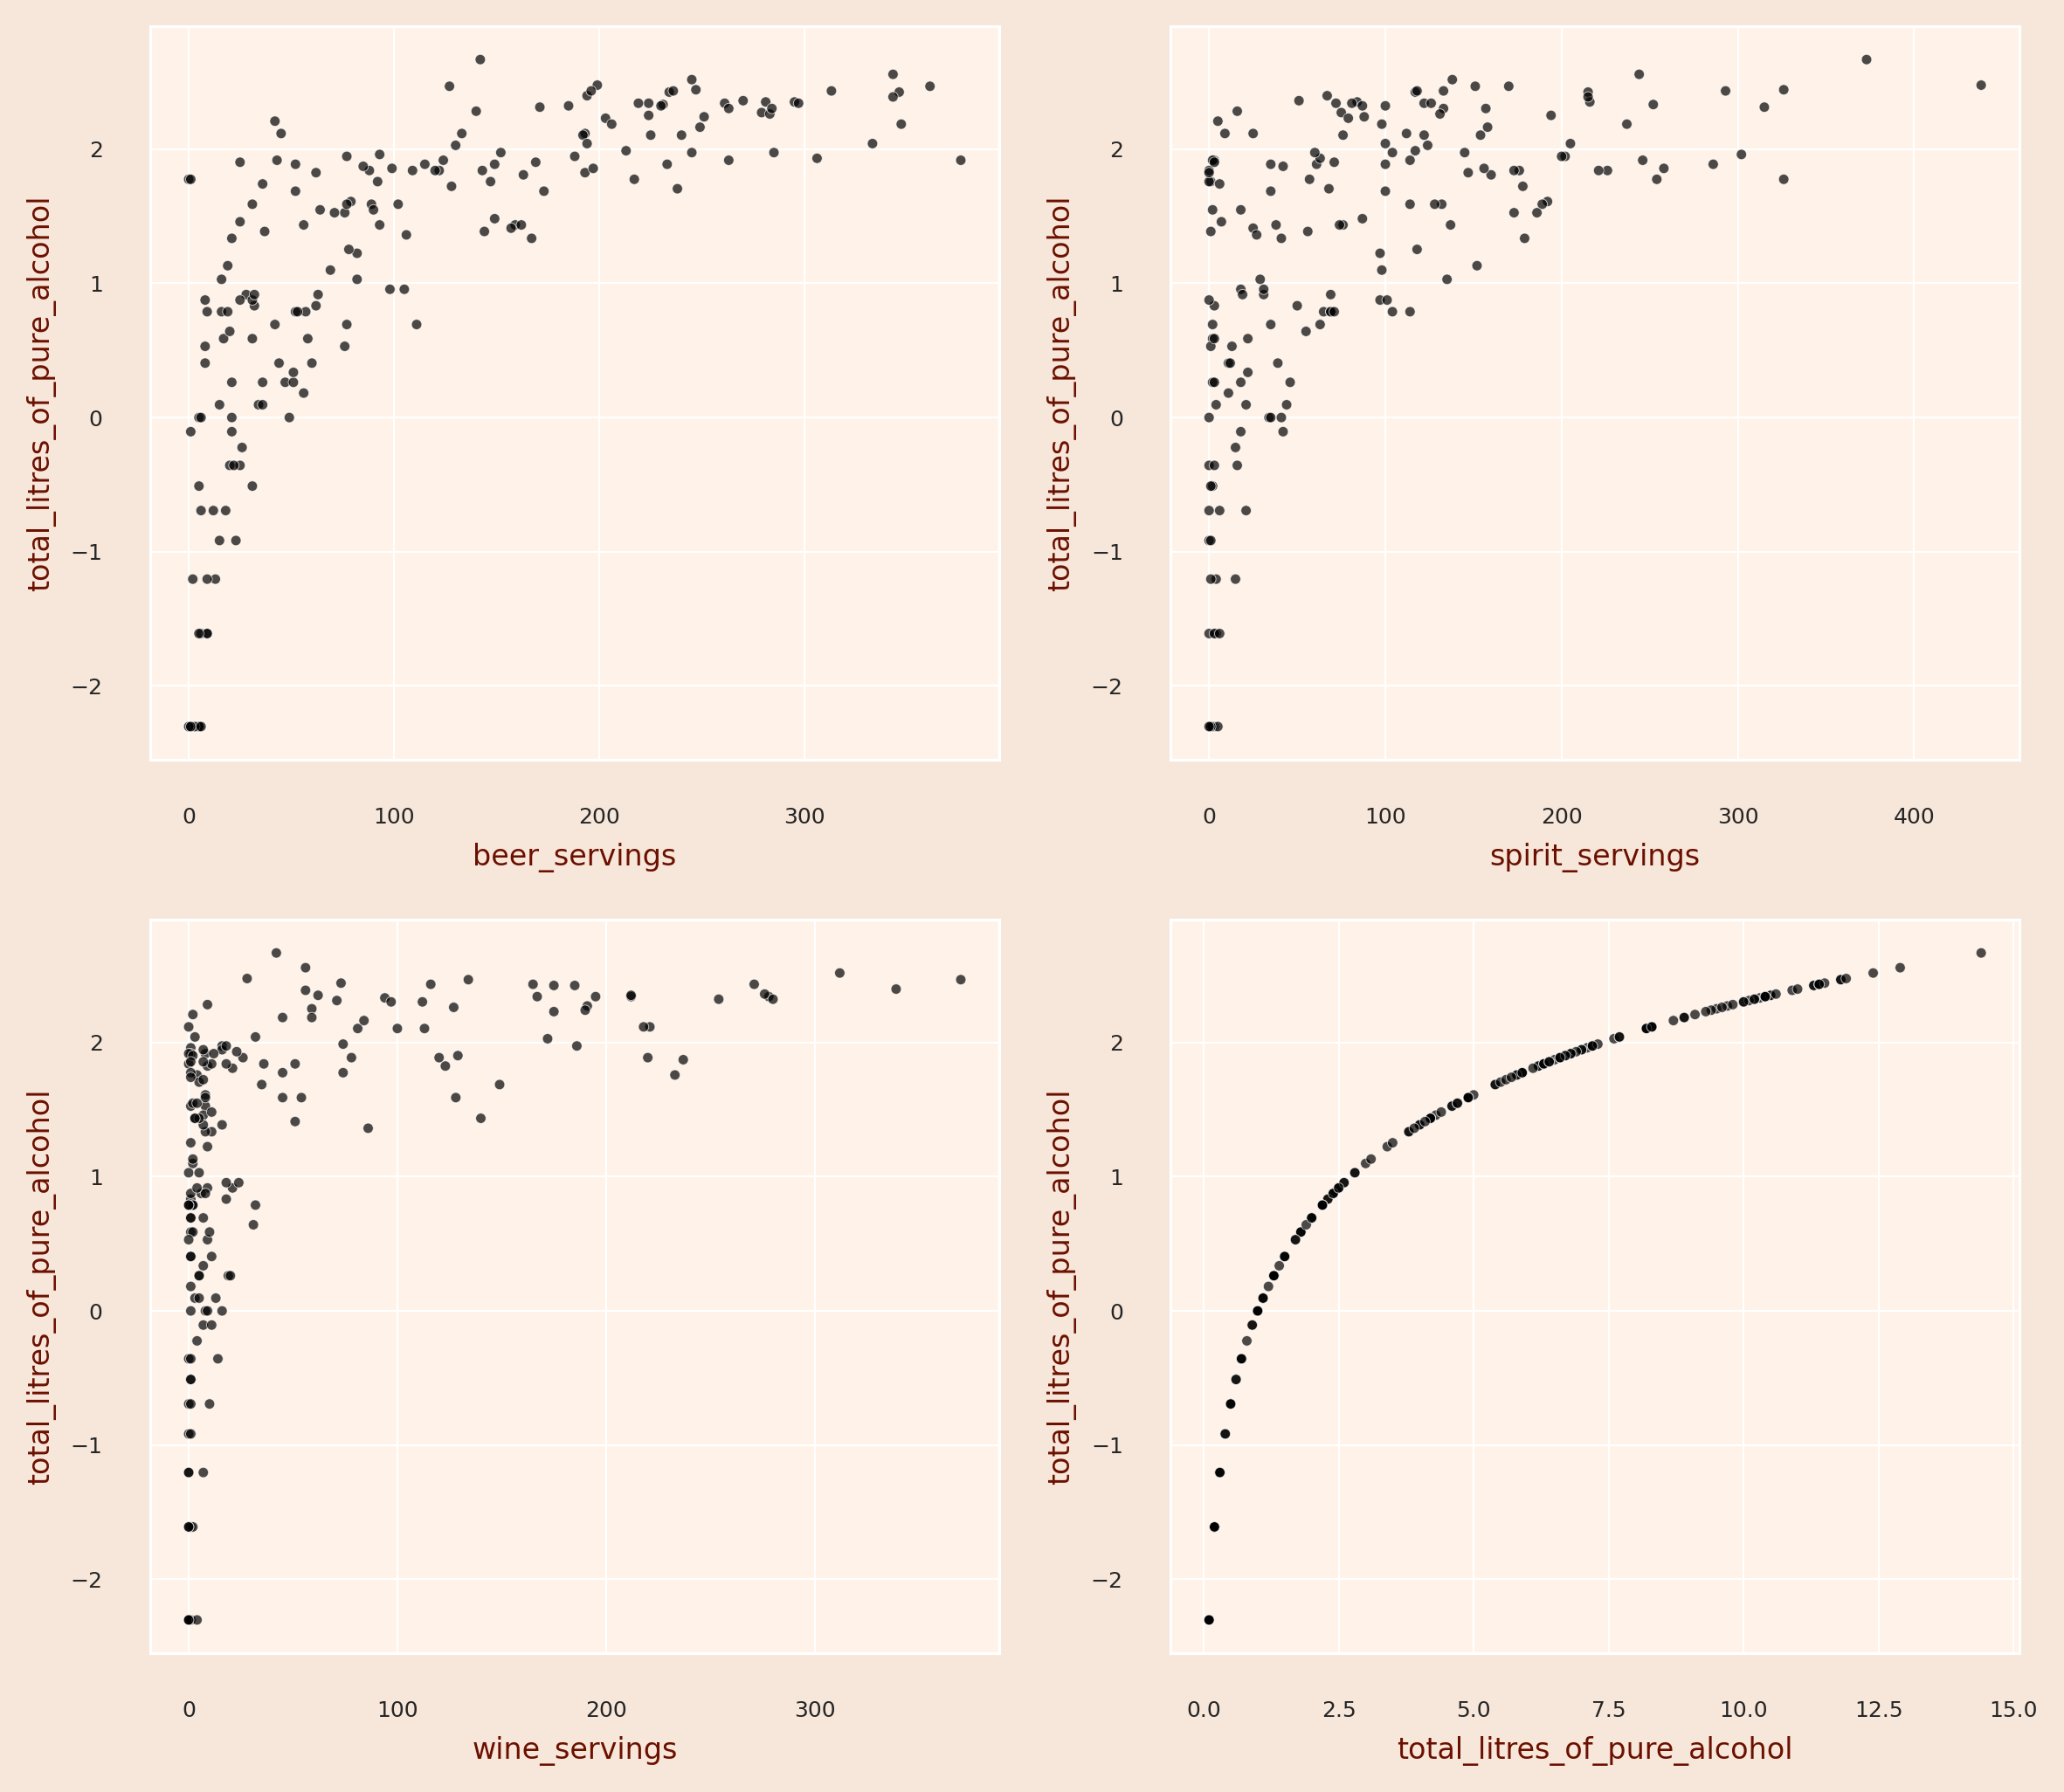

In [128]:
with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 8, 
                          'xtick.labelsize': 6, 'ytick.labelsize': 6}): 
    
    fig_0, ax_0 = plt.subplots(2, 2, figsize = (8, 7))

    for idx, (column, axes) in list(enumerate(zip(Num_vars, ax_0.flatten()))):
        
        sns.scatterplot(ax = axes, x = df[column], 
                        y = np.log(df['total_litres_of_pure_alcohol']), 
                        hue =  np.log(df['total_litres_of_pure_alcohol']),
                        palette = 'viridis', alpha = 0.7, s = 8)
    
    # Get rid of legend
    
        axes.legend([], [], frameon = False)
    
    # Remove empty figures
    
    else:
        [axes.set_visible(False) for axes in ax_0.flatten()[idx + 1:]]

plt.tight_layout()
plt.show()

# Feature Scaling

In [129]:
del_cols = ['country']
ds = df.drop(del_cols, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_features = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [130]:
scaled_features.head()

beer_servings  spirit_servings  wine_servings  total_litres_of_pure_alcohol
0      -1.052338        -0.919818      -0.622094                     -1.253377
1      -0.170108         0.579240       0.057230                      0.048599
2      -0.804521        -0.919818      -0.445973                     -1.067381
3       1.376272         0.647379       3.302886                      2.041419
4       1.098717        -0.272497      -0.055991                      0.314308

# PCA

In [131]:
pca = PCA(n_components=3)
pca.fit(scaled_features)
PCA_df = pd.DataFrame(pca.transform(scaled_features), columns=(['beer_servings','spirit_servings','wine_servings']))
PCA_df.describe().T

count          mean       std       min       25%       50%  \
beer_servings    193.0  3.106323e-17  1.652878 -1.957942 -1.497882 -0.342542   
spirit_servings  193.0 -3.034418e-17  0.901242 -2.546417 -0.285526 -0.169486   
wine_servings    193.0 -5.464828e-18  0.626834 -2.285550 -0.297777 -0.044665   

                      75%       max  
beer_servings    1.119179  3.661700  
spirit_servings  0.360693  3.191176  
wine_servings    0.271919  2.673130

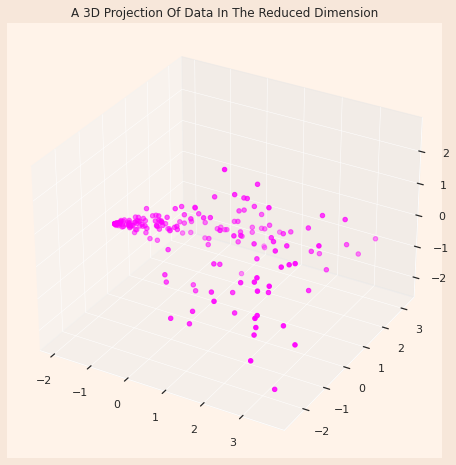

In [132]:
x =PCA_df["beer_servings"]
y =PCA_df["spirit_servings"]
z =PCA_df["wine_servings"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="magenta", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

In [133]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

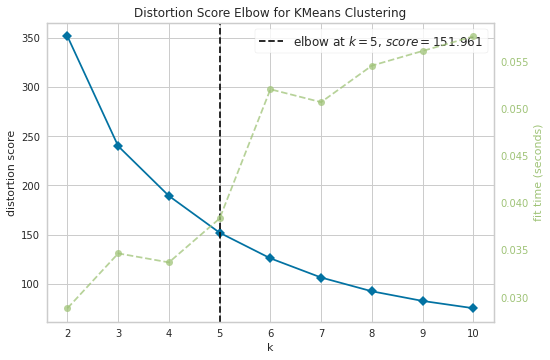

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [134]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(PCA_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [135]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
AC_df = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = AC_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= AC_df

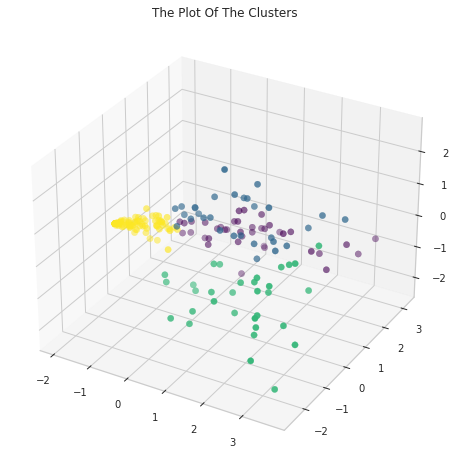

In [136]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Evaluating models

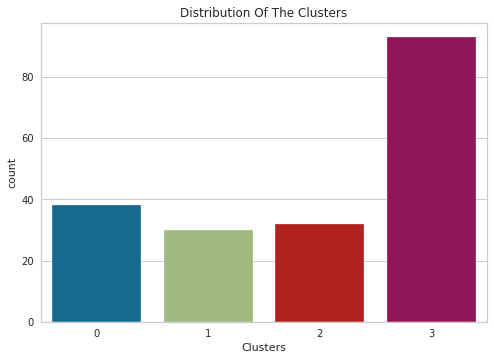

In [137]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

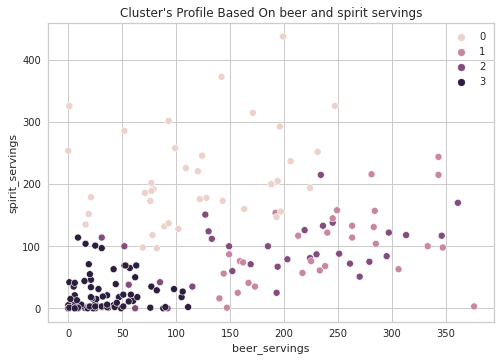

In [138]:
pl = sns.scatterplot(data = df,x=df["beer_servings"], y=df["spirit_servings"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On beer and spirit servings")
plt.legend()
plt.show()

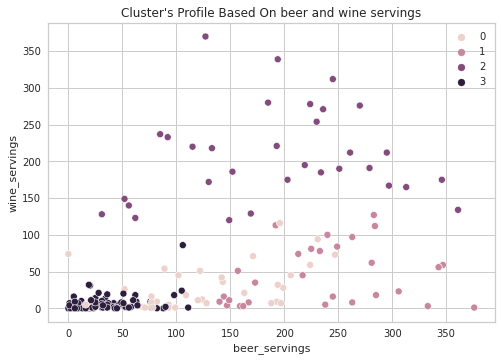

In [139]:
pl = sns.scatterplot(data = df,x=df["beer_servings"], y=df["wine_servings"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On beer and wine servings")
plt.legend()
plt.show()

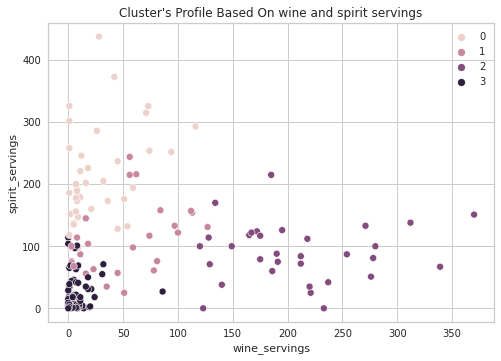

In [140]:
pl = sns.scatterplot(data = df,x=df["wine_servings"], y=df["spirit_servings"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On wine and spirit servings")
plt.legend()
plt.show()

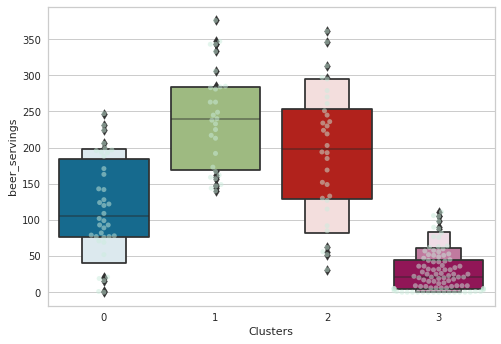

In [141]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["beer_servings"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["beer_servings"])
plt.show()

## From the above plot, it can be clearly seen that cluster 1 is our biggest set of countries closely followed by cluster 1

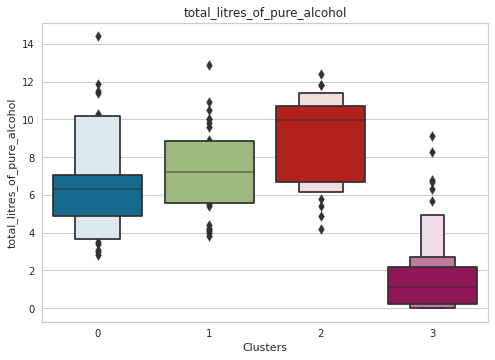

In [142]:
#Plotting the total_litres_of_pure_alcohol
plt.figure()
pl=sns.boxenplot(y=df["total_litres_of_pure_alcohol"],x=df["Clusters"])
pl.set_title("total_litres_of_pure_alcohol")
plt.show()